Potential videos for learning and implementation:
- https://www.youtube.com/watch?v=vOBbKNwi6Go&t=165s


# SEM 1 IMPLEMENTATIONS

### 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
from sklearn.metrics import accuracy_score, f1_score

### 1. Preliminary View of Data

In [2]:
# Preliminary view of data
df = pd.read_csv('/Users/muhammadsulaimanmuhammadrizam/Documents/VSCode Files/Datasets/covtype.csv')
col_names = df.columns
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [3]:
# Checking for null values in dataset
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [4]:
# Extract continuous features
cont_features = df[col_names[0:10]].copy()
cont_features.rename(columns={'Horizontal_Distance_To_Hydrology':'H_Dist_To_Water',
                              'Vertical_Distance_To_Hydrology':'V_Dist_To_Water',
                              'Horizontal_Distance_To_Roadways':'H_Dist_To_Roads',
                              'Horizontal_Distance_To_Fire_Points':'H_Dist_To_Fpoint'}, inplace=True)
cont_colnames = cont_features.columns.to_list()

# Extract discrete features
disc_features = df[col_names[10:]].copy()
disc_colnames = disc_features.columns.to_list()

# Extract wilderness areas & soil types as separate dataframes
keyword1 = 'Wilderness_Area'; keyword2 = 'Soil_Type'
WA_columns = [col for col in df.columns if keyword1 in col]; ST_columns = [col for col in df.columns if keyword2 in col]
df_WA = df[WA_columns]
df_soil = df[ST_columns]

# Identify number of labels in dataset
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [5]:
# Add new features for feature engineering
cont_features['Eucld_Dist_To_Water'] = np.sqrt(df['Vertical_Distance_To_Hydrology']**2 + df['Horizontal_Distance_To_Hydrology']**2)
cont_colnames.append('Eucld_Dist_To_Water')

cont_features['Mean_Hillshade'] = (df['Hillshade_9am']+df['Hillshade_Noon']+df['Hillshade_3pm'])/3
cont_colnames.append('Mean_Hillshade')

In [6]:
# Summary statistics for continuous features
cont_features.describe().drop('count',axis=0)

Elevation      Aspect      Slope  H_Dist_To_Water  V_Dist_To_Water  \
mean  2959.365301  155.656807  14.103704       269.428217        46.418855   
std    279.984734  111.913721   7.488242       212.549356        58.295232   
min   1859.000000    0.000000   0.000000         0.000000      -173.000000   
25%   2809.000000   58.000000   9.000000       108.000000         7.000000   
50%   2996.000000  127.000000  13.000000       218.000000        30.000000   
75%   3163.000000  260.000000  18.000000       384.000000        69.000000   
max   3858.000000  360.000000  66.000000      1397.000000       601.000000   

      H_Dist_To_Roads  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
mean      2350.146611     212.146049      223.318716     142.528263   
std       1559.254870      26.769889       19.768697      38.274529   
min          0.000000       0.000000        0.000000       0.000000   
25%       1106.000000     198.000000      213.000000     119.000000   
50%       1997.000000     218.000000      226.000000     143.000000   
75%       3328.000000     231.000000      237.000000     168.000000   
max       7117.000000     254.000000      254.000000     254.000000   

      H_Dist_To_Fpoint  Eucld_Dist_To_Water  Mean_Hillshade  
mean       1980.291226           276.065482      192.664343  
std        1324.195210           217.047653       14.465670  
min           0.000000             0.000000       31.666667  
25%        1024.000000           108.461975      185.666667  
50%        1710.000000           229.477668      195.333333  
75%        2550.000000           393.814677      203.000000  
max        7173.000000          1418.916840      213.666667

### 2. Graphical & Statistical Understanding

Need to rescale the continuous features according to a Normal distribution to observe which to include in for model fitting for ML.

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Convert the continuous features from the dataset into a numpy array
cont_features = cont_features.to_numpy()

# Normalize the continuous features
conv_cont_features = std_scaler.fit_transform(cont_features)

# Convert the normalized continuous features back into a Pandas dataframe
cont_features = pd.DataFrame(conv_cont_features, columns=cont_colnames)

# Adding back 'Cover_Type' labels to normalized continuous data
cont_features['Cover_Type'] = df['Cover_Type']
cont_features.head()

Elevation    Aspect     Slope  H_Dist_To_Water  V_Dist_To_Water  \
0  -1.297805 -0.935157 -1.482820        -0.053767        -0.796273   
1  -1.319235 -0.890480 -1.616363        -0.270188        -0.899197   
2  -0.554907 -0.148836 -0.681563        -0.006719         0.318742   
3  -0.622768 -0.005869  0.520322        -0.129044         1.227908   
4  -1.301377 -0.988770 -1.616363        -0.547771        -0.813427   

   H_Dist_To_Roads  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0        -1.180146       0.330743        0.439143       0.142960   
1        -1.257106       0.293388        0.590899       0.221342   
2         0.532212       0.816364        0.742654      -0.196691   
3         0.474492       0.965786        0.742654      -0.536343   
4        -1.256464       0.293388        0.540313       0.195215   

   H_Dist_To_Fpoint  Eucld_Dist_To_Water  Mean_Hillshade  Cover_Type  
0          3.246283            -0.083233        0.530152           5  
1          3.205504            -0.294777        0.645367           5  
2          3.126965            -0.001362        0.668410           2  
3          3.194931            -0.031466        0.461022           2  
4          3.165479            -0.566983        0.599281           5

Plot histograms of data based on label to identify independence and distinguish normality

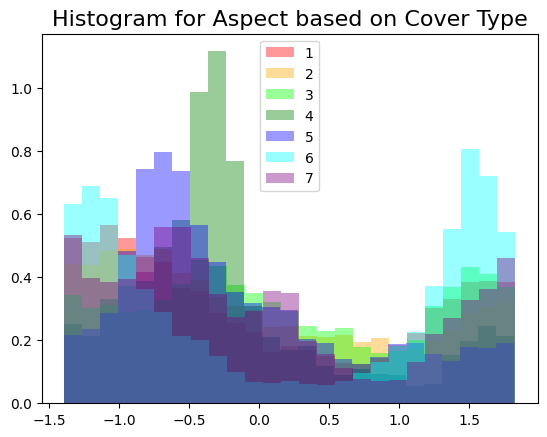

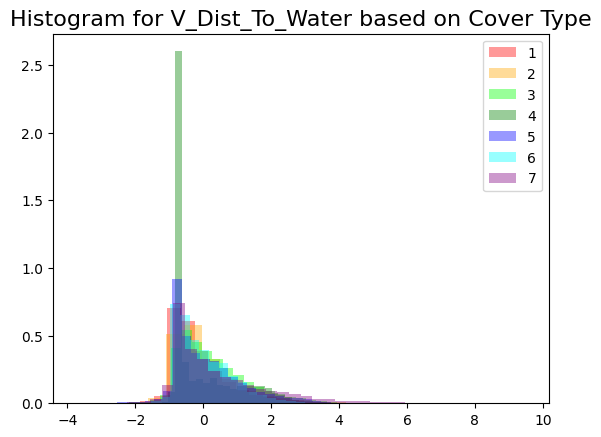

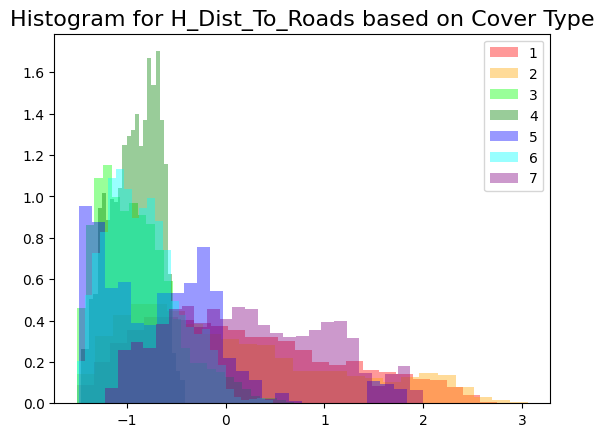

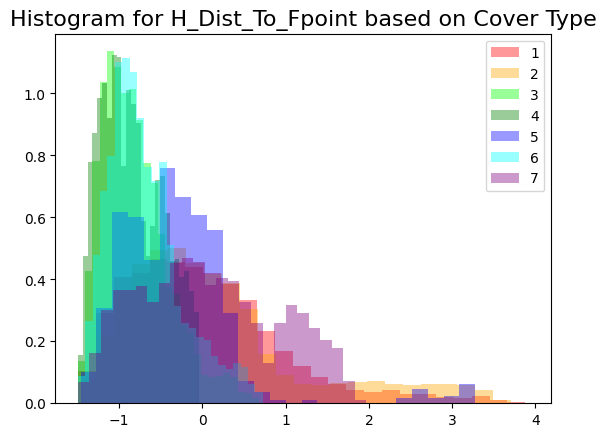

In [8]:
# Define plotting function for histogram
def hist_plotter(dataframe, feature_names):
    color_list = ['red','orange','lime','green','blue','cyan','purple']
    for feature in feature_names:
        for i in range(1,8):
            plt.hist(dataframe[feature][df['Cover_Type']==i],color=color_list[i-1],alpha=0.4, density=True,bins=25)
            plt.title(f'Histogram for {feature} based on Cover Type',fontsize=16)
        plt.legend([1,2,3,4,5,6,7])
        plt.show()

# Plot histograms of continuous features
hist_plotter(cont_features,cont_colnames)

After normalizing, all **histograms based on label overlap** each other; suggests **dependence between examples** from cont. features

Performing Kolmogorov-Smirnov test on each of the continuous features, segmenting based on label (check Normality)

H0: Empirical distribution **same** as theoretical distribution.     VS     H1: Empirical distribution **not same** as theoretical distribution.

If P-value > 0.05, no evidence to reject H0, conclude that distribution is Normal.

**Reference:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [9]:
from scipy import stats

# Iteratively calculate test statistic and p-value for each label under each feature
for name in cont_colnames:
    print(f'\n1-Sample Kolmogorov-Smirnov Test done for {name}')
    for i in range(1,8):
        _, p_val = stats.ks_1samp(cont_features[name].loc[cont_features['Cover_Type']==i],cdf=stats.norm.cdf)
        print(f'P-value for Label {i} = {p_val}')


1-Sample Kolmogorov-Smirnov Test done for Elevation
P-value for Label 1 = 0.0
P-value for Label 2 = 0.0
P-value for Label 3 = 0.0
P-value for Label 4 = 0.0
P-value for Label 5 = 0.0
P-value for Label 6 = 0.0
P-value for Label 7 = 0.0

1-Sample Kolmogorov-Smirnov Test done for Aspect
P-value for Label 1 = 0.0
P-value for Label 2 = 0.0
P-value for Label 3 = 0.0
P-value for Label 4 = 1.9201864065387713e-155
P-value for Label 5 = 8.122018428935224e-251
P-value for Label 6 = 0.0
P-value for Label 7 = 3.336861946970597e-253

1-Sample Kolmogorov-Smirnov Test done for Slope
P-value for Label 1 = 0.0
P-value for Label 2 = 0.0
P-value for Label 3 = 0.0
P-value for Label 4 = 1.9198319071176777e-149
P-value for Label 5 = 2.9629179635269205e-172
P-value for Label 6 = 0.0
P-value for Label 7 = 8.365609651239935e-162

1-Sample Kolmogorov-Smirnov Test done for H_Dist_To_Water
P-value for Label 1 = 0.0
P-value for Label 2 = 0.0
P-value for Label 3 = 0.0
P-value for Label 4 = 0.0
P-value for Label 5 = 

Performing Lilliefors test as secondary check to Normality. Same conditions of H0, H1 as from K-S test.

In [10]:
from statsmodels.stats.diagnostic import lilliefors

# Iteratively calculate test statistic and p-value for each label under each feature
for name in cont_colnames:
    print(f'\nLilliefors Test done for {name}')
    for i in range(1, 8):
        data = cont_features.loc[cont_features['Cover_Type'] == i, name]
        _, pval = lilliefors(data, dist='norm')
        print(f'P-value for Label {i} = {pval}')


Lilliefors Test done for Elevation
P-value for Label 1 = 0.0009999999999998899
P-value for Label 2 = 0.0009999999999998899
P-value for Label 3 = 0.0009999999999998899
P-value for Label 4 = 0.0009999999999998899
P-value for Label 5 = 0.0009999999999998899
P-value for Label 6 = 0.0009999999999998899
P-value for Label 7 = 0.0009999999999998899

Lilliefors Test done for Aspect
P-value for Label 1 = 0.0009999999999998899
P-value for Label 2 = 0.0009999999999998899
P-value for Label 3 = 0.0009999999999998899
P-value for Label 4 = 0.0009999999999998899
P-value for Label 5 = 0.0009999999999998899
P-value for Label 6 = 0.0009999999999998899
P-value for Label 7 = 0.0009999999999998899

Lilliefors Test done for Slope
P-value for Label 1 = 0.0009999999999998899
P-value for Label 2 = 0.0009999999999998899
P-value for Label 3 = 0.0009999999999998899
P-value for Label 4 = 0.0009999999999998899
P-value for Label 5 = 0.0009999999999998899
P-value for Label 6 = 0.0009999999999998899
P-value for Label 7

Performing Kruskal-Wallis H test between label distributions in each feature (check independence).

When performing K-W test, 2 requirements are need to be satistfied:
1. ≥3 independent random samples
2. ≥5 observations

**Note:** As this test is non-parametric, normality assumption is unnecessary; only consider same shape, which has been fairly achieved to some extent after standardizing distributions. 

Criteria 1 will potentially not be satisfied for some of the continuous features. Based on viewing the histograms of the normalized values, there are signs of overlapping between distributions, suggesting the Kruskal-Wallis H test might not be entirely reliable here. 

H0: **Populations are similar** and have **same location**.     VS     H1: **Populations are NOT similar** and have **DIFFERENT location**.

If P-value > 0.05, no evidence to reject H0, conclude that label distributions are independent of each other.

**Reference:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [11]:
# Iteratively separating each label per feature
for name in cont_colnames:
    label1 = cont_features[name].loc[cont_features['Cover_Type']==1]; label2 = cont_features[name].loc[cont_features['Cover_Type']==2]
    label3 = cont_features[name].loc[cont_features['Cover_Type']==3]; label4 = cont_features[name].loc[cont_features['Cover_Type']==4]
    label5 = cont_features[name].loc[cont_features['Cover_Type']==5]; label6 = cont_features[name].loc[cont_features['Cover_Type']==6]
    label7 = cont_features[name].loc[cont_features['Cover_Type']==7]
    
    # Calculating and displaying K-W test p-value
    print(f'\nKruskal-Wallis H Test done for {name}')
    _, p_val = stats.kruskal(label1,label2,label3,label4,label5,label6,label7)
    print(f'P-value for {name} = {p_val}')



Kruskal-Wallis H Test done for Elevation
P-value for Elevation = 0.0

Kruskal-Wallis H Test done for Aspect
P-value for Aspect = 0.0

Kruskal-Wallis H Test done for Slope
P-value for Slope = 0.0

Kruskal-Wallis H Test done for H_Dist_To_Water
P-value for H_Dist_To_Water = 0.0

Kruskal-Wallis H Test done for V_Dist_To_Water
P-value for V_Dist_To_Water = 0.0

Kruskal-Wallis H Test done for H_Dist_To_Roads
P-value for H_Dist_To_Roads = 0.0

Kruskal-Wallis H Test done for Hillshade_9am
P-value for Hillshade_9am = 0.0

Kruskal-Wallis H Test done for Hillshade_Noon
P-value for Hillshade_Noon = 0.0

Kruskal-Wallis H Test done for Hillshade_3pm
P-value for Hillshade_3pm = 0.0

Kruskal-Wallis H Test done for H_Dist_To_Fpoint
P-value for H_Dist_To_Fpoint = 0.0

Kruskal-Wallis H Test done for Eucld_Dist_To_Water
P-value for Eucld_Dist_To_Water = 0.0

Kruskal-Wallis H Test done for Mean_Hillshade
P-value for Mean_Hillshade = 0.0


Checking correlations between continuous features to find potential of interactions

In [12]:
# Define correlation matrix from continuous features
corr_mat = cont_features.corr()

# Plot heatmap
plt.figure(figsize=(9,5))
sns.heatmap(corr_mat,annot=True)
plt.show()

Wilderness_Area and Soil_Type are one-hot encoded features of 4 and 40 parts respectively, can't carry out similar statistical tests.

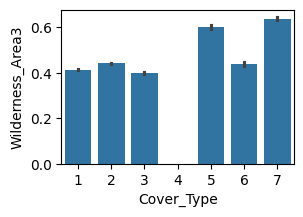

In [13]:
# Plotting general proportion plots for Wilderness_Area
for i in range(1,5):
    plt.figure(figsize=(3,2))
    sns.barplot(data=disc_features, y=f'Wilderness_Area{i}',x='Cover_Type')
    plt.show()

# SEM 2 IMPLEMENTATIONS

### 3. Feature Selection

In [14]:
# Updated dataframe (rescaled continuous features)
df_upd = pd.concat([cont_features.drop('Cover_Type',axis=1), disc_features], axis=1)
df_upd_X = df_upd.drop('Cover_Type',axis=1)
df_upd_y = df_upd['Cover_Type']

Performing a 80/10/10 split on the updated DataFrame for training, validation and test sets. However, this considers an imbalanced training set, thus the naming convention given as such.

This is to motivate wrapper-based and embedded feature selection, which require an explicit training set.

In [15]:
from sklearn.model_selection import train_test_split
X_train_df_upd_imbal, X_temp_df_upd_imbal, y_train_df_upd_imbal, y_temp_df_upd_imbal = train_test_split(df_upd_X, df_upd_y, 
                                                                                                train_size=0.8, 
                                                                                                stratify=df_upd_y,
                                                                                                random_state=42)

X_valid_df_upd_imbal, X_test_df_upd_imbal, y_valid_df_upd_imbal, y_test_df_upd_imbal = train_test_split(X_temp_df_upd_imbal, y_temp_df_upd_imbal, 
                                                                                                train_size=0.5, 
                                                                                                stratify=y_temp_df_upd_imbal,
                                                                                                random_state=42)

# NOTE: This selects 80% of examples from each label for training set, followed by 10% for both validation & test sets

Custom undersampling to split df_upd, ensuring equal label proportions in training and validation sets. 

In [16]:
# Extract observations with label of smallest proportion (in this case, Cover_Type4)
grp4 = df_upd.loc[df_upd['Cover_Type']==4]

# Split observations into 80/10/10  proportions
grp4_train, grp4_valid, grp4_test = np.split(grp4, [int(0.8*len(grp4)),int(0.9*len(grp4))])

# Identify length of grp4_train & grp4_valid to have even number of observations from other groups for model training and evaluation
print(f'Observations from Cover_Type4 for training: {len(grp4_train)}')
print(f'Observations from Cover_Type4 for validation: {len(grp4_valid)}\n')

# Obtain the observations from remaining Cover_Types for splitting into training, validation and test sets
grp1 = df_upd.loc[df_upd['Cover_Type']==1]
grp2 = df_upd.loc[df_upd['Cover_Type']==2]
grp3 = df_upd.loc[df_upd['Cover_Type']==3]
grp5 = df_upd.loc[df_upd['Cover_Type']==5]
grp6 = df_upd.loc[df_upd['Cover_Type']==6]
grp7 = df_upd.loc[df_upd['Cover_Type']==7]

# Defining the training, validation and test sets
train = pd.DataFrame(); valid = pd.DataFrame(); test = pd.DataFrame()
groups = [grp1, grp2, grp3, grp4, grp5, grp6, grp7]

for i, dataframe in enumerate(groups):
    # Obtain the indices of the dataframe based on its given Cover_Type value
    total_numbers = sorted(dataframe.index.values)

    # Randomly sample numbers for training set, append corresponding observations into final training set
    random.seed(42)
    train_indices = random.sample(total_numbers, len(grp4_train))
    train = pd.concat([train, dataframe.loc[train_indices]], ignore_index=True)

    # Create a list of leftover indices to split further into validation and test sets
    leftover_indices = [num for num in total_numbers if num not in train_indices]

    # Randomly sample numbers for validation set, append corresponding observations into final validation set
    random.seed(42)
    valid_indices = random.sample(leftover_indices, len(grp4_valid))
    valid = pd.concat([valid, dataframe.loc[valid_indices]], ignore_index=True)

    # Leftover numbers are assigned to the test set, append corresponding observations into the final test set
    test_indices = [num for num in leftover_indices if num not in valid_indices]
    test = pd.concat([test, dataframe.loc[test_indices]], ignore_index=True)

    # Print number of observations elements of the sampled and remainder lists for verification
    print(f'Cover Type {i+1}    [Training Set: {len(train_indices)}   Validation Set: {len(valid_indices)}   Test Set: {len(test_indices)}]\n')

# Shuffle observations in newly-updated training, validation, and test sets
train_df_upd = train.sample(frac=1,random_state=42)
valid_df_upd = valid.sample(frac=1,random_state=42)
test_df_upd = test.sample(frac=1,random_state=42)

### NOTE: Validation set does not necessarily need to be balanced, as it is just supposed to 'mimic' the test data...

/Applications/anaconda3/envs/fyp/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Observations from Cover_Type4 for training: 2197
Observations from Cover_Type4 for validation: 275

Cover Type 1    [Training Set: 2197   Validation Set: 275   Test Set: 209368]

Cover Type 2    [Training Set: 2197   Validation Set: 275   Test Set: 280829]

Cover Type 3    [Training Set: 2197   Validation Set: 275   Test Set: 33282]

Cover Type 4    [Training Set: 2197   Validation Set: 275   Test Set: 275]

Cover Type 5    [Training Set: 2197   Validation Set: 275   Test Set: 7021]

Cover Type 6    [Training Set: 2197   Validation Set: 275   Test Set: 14895]

Cover Type 7    [Training Set: 2197   Validation Set: 275   Test Set: 18038]



In [17]:
# Train/Valid/Test splits on df_upd (updated dataframe with rescaled continuous features)
X_train_df_upd_bal = train_df_upd.drop('Cover_Type',axis=1); y_train_df_upd_bal = train_df_upd['Cover_Type']
X_valid_df_upd_bal = valid_df_upd.drop('Cover_Type',axis=1); y_valid_df_upd_bal = valid_df_upd['Cover_Type']
X_test_df_upd_bal = test_df_upd.drop('Cover_Type',axis=1); y_test_df_upd_bal = test_df_upd['Cover_Type']

Instead of one-hot-encoding, combine all relevant columns for Wilderness_Area and Soil_Type respectively. This is for more visible insight on whether the discrete features as a whole are important towards classification, rather than each of their parts.

In [18]:
# Combining all one-hot encoded columns for Wilderness_Area and Soil_Type respectively
WA_range = np.arange(1,5); ST_range = np.arange(1,41)
for dataframe in [X_train_df_upd_imbal, X_valid_df_upd_imbal, X_test_df_upd_imbal,
                  X_train_df_upd_bal, X_valid_df_upd_bal, X_test_df_upd_bal, df_upd]:
    # Add combined columns
    dataframe['Wilderness_Area'] = dataframe[WA_columns].values.dot(WA_range)
    dataframe['Soil_Type'] = dataframe[ST_columns].values.dot(ST_range)

    # Drop previous OHE columns
    dataframe.drop(WA_columns,axis=1,inplace=True)
    dataframe.drop(ST_columns,axis=1,inplace=True)

df_upd_X = df_upd.drop('Cover_Type',axis=1)
df_upd_y = df_upd['Cover_Type']

Conducting wrapper-based feature selection

In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
# from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
SFFS = SequentialFeatureSelector(estimator = DecisionTreeClassifier(random_state=42),
                                 n_features_to_select = 7,
                                 direction = 'forward',
                                 scoring = 'accuracy',
                                 cv = 5).fit(X_train_df_upd_imbal,y_train_df_upd_imbal)

selected_feature_indices = SFFS.get_support(indices=True)
selected_feature_names = X_train_df_upd_imbal.columns[selected_feature_indices]
print(selected_feature_names)

Index(['Elevation', 'H_Dist_To_Water', 'H_Dist_To_Roads', 'Hillshade_9am',
       'H_Dist_To_Fpoint', 'Wilderness_Area', 'Soil_Type'],
      dtype='object')


In [ ]:
SBFS = SequentialFeatureSelector(estimator = RandomForestClassifier(random_state=42, n_jobs=-1),
                                 k_features = 7,
                                 forward = False,
                                 floating = False,
                                 scoring = 'accuracy',
                                 cv = 5).fit(X_train_df_upd_imbal,y_train_df_upd_imbal)

seq_select_dict = pd.DataFrame.from_dict(SBFS.get_metric_dict()).T.drop(['cv_scores'],axis=1)
seq_select_dict.sort_values('avg_score',ascending=False)
print(seq_select_dict.iloc[0]['feature_names'])

In [ ]:
sfs_options = ['Forward Selection','Backward Elimination', 'Forward Floating Selection','Backward Floating Elimination']
list_idx = 0
for boolean_flt in [False, True]:
    for boolean_dir in [True, False]:
        print(f'Sequential {sfs_options[list_idx]} Method')
        Seq_Feat_Select = SequentialFeatureSelector(estimator = RandomForestClassifier(n_jobs=-1),
                                                    k_features = 7,
                                                    forward = boolean_dir,
                                                    floating = boolean_flt,
                                                    verbose = 2,
                                                    scoring = "accuracy",
                                                    cv = 5).fit(X_train_df_upd_bal,y_train_df_upd_bal)
        seq_select_dict = pd.DataFrame.from_dict(Seq_Feat_Select.get_metric_dict()).T.drop(['cv_scores'],axis=1)
        seq_select_dict.sort_values('avg_score',ascending=False)
        print(seq_select_dict.iloc[0]['feature_names'])

        list_idx += 1

### TO BE EDITED FURTHER ###


In [ ]:
process2 = RFC_seq_ft_select(X_train_df_upd_bal,y_train_df_upd_bal,7,forward=False)
seq_select_dict2 = pd.DataFrame.from_dict(process2).T.drop(['cv_scores'],axis=1)
seq_select_dict2.sort_values('avg_score',ascending=False)

In [ ]:
### NOTE: This was obtained from SBFS using mlxtend, due to extensive computation, code was run previously but result was kept here for ref
print(seq_select_dict2['feature_names'].iloc[-1])

('Elevation', 'Aspect', 'H_Dist_To_Water', 'H_Dist_To_Roads', 'H_Dist_To_Fpoint', 'Wilderness_Area', 'Soil_Type')


In [ ]:
sfs_options = ['Forward Selection','Backward Elimination', 'Forward Floating Selection','Backward Floating Elimination']
list_idx = 0

print(f'Sequential {sfs_options[list_idx]} Method')
Seq_Feat_Select = SequentialFeatureSelector(estimator = RandomForestClassifier(n_jobs=-1),
                                            k_features = 7,
                                            forward = True,
                                            floating = False,
                                            verbose = 2,
                                            scoring = "accuracy",
                                            cv = 5).fit(X_train_df_upd_imb,y_train_df_upd_imb)
seq_select_dict = pd.DataFrame.from_dict(Seq_Feat_Select.get_metric_dict()).T.drop(['cv_scores'],axis=1)
seq_select_dict.sort_values('avg_score',ascending=False)
print(seq_select_dict.iloc[0]['feature_names'])

Embedded feature selection (Decision Tree Classifer feature importance)

Check #1: all features from df_upd

Check #2: conditioning on each soil type, perform feature importance with the remaining features excluding Soil_Type

Check #3: look at solely soil types to identify the top 15, followed by DTC feature importance viewing with resp. to those 15 soils

Check #4: add interactions of chosen soil types from Check #2 into df_upd, observe the importance (signify importance of interactions)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
### Check #1
# Establish Decision Tree Classifier for identifying feature importance
DTC_ft_select_1 = DecisionTreeClassifier(random_state=42).fit(X_train_df_upd_imbal,y_train_df_upd_imbal)

# Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
feat_imp1 = pd.DataFrame(DTC_ft_select_1.feature_importances_, index=X_train_df_upd_imbal.columns).reset_index()
feat_imp1.columns=['feature','importance']
feat_imp1 = feat_imp1.nlargest(15,columns='importance')
n_selected_feats = len(feat_imp1.feature)

# Set up barplot with 10 bars, with lengths corresponding to that of the scores under feat_imp DataFrame defined earlier
bars = plt.barh(np.arange(n_selected_feats),feat_imp1['importance'].iloc[::-1],color='blue',alpha=0.6)

# Display scores for each of the top 10 important features 
for bar,name,value in zip(bars, list(feat_imp1['feature'].iloc[::-1]), list(feat_imp1['importance'].iloc[::-1])):
    plt.text((bar.get_width()+0.005),(bar.get_y()+0.32),'{:.3f}'.format(value))
# 'bar' iterates through the 10 rectangle/bar objects generated by plt.barh
# 'name' iterates through the names of the top 10 features selected
# 'value' iterates through the corresponding importance score for each of the top 10 features
# plt.text() adds text at certain coordinates. bar.get_width() returns length of bar from origin, bar.get_y() returns y-coord where it starts before plotting up 

plt.xticks([]); plt.yticks(np.arange(n_selected_feats),feat_imp1['feature'].iloc[::-1])
sns.despine(top=True, bottom=True,left=True)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Based on Decision Tree Classifier',fontweight='bold')
plt.show()

In [24]:
### Check #2
# Compile column names of all continuous features and Wilderness_Area in a list
list_of_features = cont_colnames.copy(); list_of_features.append('Wilderness_Area')

# Create separate DataFrame to store the sum of importances for all features
overall_importance = pd.DataFrame({'feature': list_of_features,'importance':np.zeros(len(list_of_features))})

# Initialize subplots for plotting DTC feature importance bar charts
fig, axs = plt.subplots(10, 4, figsize=(15, 30))
idx = 1

# Plots a DTC feature importance bar chart for each sample of Soil_Type taking values of 1 to 40
for i in range(10):
    for j in range(4):
        if idx<41:
            # Extract the observations such that Soil_Type has value 'idx'
            temp_set = df_upd.loc[df_upd['Soil_Type']==idx]
        
            # Separate according to X and y, followed by a general 70/30 split of the data
            X_soilbased_select = temp_set.drop(['Cover_Type','Soil_Type'],axis=1)
            y_soilbased_select = temp_set['Cover_Type']
            X_train_soil_select, X_rest_soil_select, y_train_soil_select, y_rest_soil_select = train_test_split(X_soilbased_select,y_soilbased_select,random_state=42,train_size=0.8)

            # Establish Decision Tree Classifier for identifying feature importance
            DTC_ft_select2 = DecisionTreeClassifier(random_state=42).fit(X_train_soil_select,y_train_soil_select,)

            # Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
            feat_imp=pd.DataFrame(DTC_ft_select2.feature_importances_, index=X_train_soil_select.columns).reset_index()
            feat_imp.columns=['feature','importance']
            feat_imp = feat_imp.nlargest(15,columns='importance')
            n_selected_feats = len(feat_imp.feature)

            # Plot bar chart in respective subplot
            axs[i,j].barh(np.arange(n_selected_feats),feat_imp['importance'].iloc[::-1],color='blue',alpha=0.6)
            axs[i,j].set_yticks(np.arange(n_selected_feats),feat_imp['feature'].iloc[::-1])
            axs[i,j].set_xticks([])
            axs[i,j].set_title(f'Feature Importance on Soil Type {idx}',fontweight='bold')
            for k, (name, value) in enumerate(zip(feat_imp['feature'].iloc[::-1],feat_imp['importance'].iloc[::-1])):
                axs[i,j].text(value,k,'{:.3f}'.format(value),ha='left',va='center')
            
            # Adds the importance value for each corresponding feature into that separate DataFrame
            overall_importance['importance'] += feat_imp['importance']

            # Iterate through idx every one step until all the graphs have been plotted
            idx += 1

# Remove axis lines and sufficiently spaces the graphs from each other
sns.despine(top=True, bottom=True,left=True)
plt.tight_layout()
plt.show()

In [25]:
overall_importance['importance'] = overall_importance['importance']/40
overall_importance.sort_values('importance',ascending=False)

feature  importance
9      H_Dist_To_Fpoint    0.207268
0             Elevation    0.199457
5       H_Dist_To_Roads    0.169173
3       H_Dist_To_Water    0.059437
10  Eucld_Dist_To_Water    0.054467
12      Wilderness_Area    0.047576
4       V_Dist_To_Water    0.042367
6         Hillshade_9am    0.039162
1                Aspect    0.035371
8         Hillshade_3pm    0.022572
7        Hillshade_Noon    0.021068
11       Mean_Hillshade    0.014112
2                 Slope    0.012971

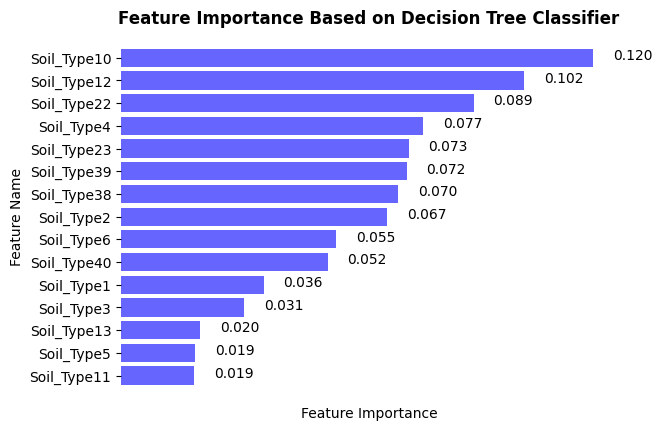

In [26]:
### Check #3
# Perform split for training set on solely 40 soil types
X_train_df_soil, X_rest_df_soil, y_train_df_soil, y_rest_df_soil = train_test_split(df_soil,df['Cover_Type'],random_state=42, test_size=0.2)

# Establish Decision Tree Classifier for identifying feature importance
DTC_ft_select_3 = DecisionTreeClassifier(random_state=42).fit(X_train_df_soil,y_train_df_soil)

# Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
feat_imp3 = pd.DataFrame(DTC_ft_select_3.feature_importances_, index=X_train_df_soil.columns).reset_index()
feat_imp3.columns=['feature','importance']
feat_imp3 = feat_imp3.nlargest(15,columns='importance')
n_selected_feats = len(feat_imp3.feature)

# Set up barplot with 10 bars, with lengths corresponding to that of the scores under feat_imp DataFrame defined earlier
bars = plt.barh(np.arange(n_selected_feats),feat_imp3['importance'].iloc[::-1],color='blue',alpha=0.6)

# Display scores for each of the top 10 important features 
for bar,name,value in zip(bars, list(feat_imp3['feature'].iloc[::-1]), list(feat_imp3['importance'].iloc[::-1])):
    plt.text((bar.get_width()+0.005),(bar.get_y()+0.32),'{:.3f}'.format(value))

plt.xticks([]); plt.yticks(np.arange(n_selected_feats),feat_imp3['feature'].iloc[::-1])
sns.despine(top=True, bottom=True,left=True)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Based on Decision Tree Classifier',fontweight='bold')
plt.show()

List of soil types with importance > 0.05 (Ordered in descending order of importance)

[10, 12, 22, 4, 23, 39, 38, 2, 6, 40]


In [27]:
list_of_features = cont_colnames.copy(); list_of_features.append('Wilderness_Area')

# Create separate DataFrame to store the sum of importances for all features
overall_importance = pd.DataFrame({'feature': list_of_features,'importance':np.zeros(len(list_of_features))})

# Initialize subplots for plotting DTC feature importance bar charts
fig, axs = plt.subplots(5, 2, figsize=(10, 13))
soil_list = [10, 12, 22, 4, 23, 39, 38, 2, 6, 40]; idx = 0

# Plots a DTC feature importance bar chart for each sample of Soil_Type taking values of 1 to 40
for i in range(5):
    for j in range(2):
        if idx < 11:
            # Extract the observations such that Soil_Type has value 'idx'
            temp_set = df_upd.loc[df_upd['Soil_Type']==soil_list[idx]]
        
            # Separate according to X and y, followed by a general 70/30 split of the data
            X_soilbased_select = temp_set.drop(['Cover_Type','Soil_Type'],axis=1)
            y_soilbased_select = temp_set['Cover_Type']
            X_train_soil_select, X_rest_soil_select, y_train_soil_select, y_rest_soil_select = train_test_split(X_soilbased_select,y_soilbased_select,random_state=42,train_size=0.8)

            # Establish Decision Tree Classifier for identifying feature importance
            DTC_ft_select3b = DecisionTreeClassifier(random_state=42).fit(X_train_soil_select,y_train_soil_select)

            # Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
            feat_imp=pd.DataFrame(DTC_ft_select3b.feature_importances_, index=X_train_soil_select.columns).reset_index()
            feat_imp.columns=['feature','importance']
            feat_imp = feat_imp.nlargest(15,columns='importance')
            n_selected_feats = len(feat_imp.feature)

            # Plot bar chart in respective subplot
            axs[i,j].barh(np.arange(n_selected_feats),feat_imp['importance'].iloc[::-1],color='blue',alpha=0.6)
            axs[i,j].set_yticks(np.arange(n_selected_feats),feat_imp['feature'].iloc[::-1])
            axs[i,j].set_xticks([])
            axs[i,j].set_title(f'Feature Importance on Soil Type {soil_list[idx]}',fontweight='bold')
            for k, (name, value) in enumerate(zip(feat_imp['feature'].iloc[::-1],feat_imp['importance'].iloc[::-1])):
                axs[i,j].text(value,k,'{:.3f}'.format(value),ha='left',va='center')
            
            # Adds the importance value for each corresponding feature into that separate DataFrame
            overall_importance['importance'] += feat_imp['importance']

            # Iterate through idx every one step until all the graphs have been plotted
            idx += 1

# Remove axis lines and sufficiently spaces the graphs from each other
sns.despine(top=True, bottom=True,left=True)
plt.tight_layout()
plt.show()

In [28]:
overall_importance['importance'] = overall_importance['importance']/10
overall_importance.sort_values('importance',ascending=False)

feature  importance
0             Elevation    0.221854
9      H_Dist_To_Fpoint    0.200649
5       H_Dist_To_Roads    0.180824
12      Wilderness_Area    0.099748
10  Eucld_Dist_To_Water    0.056343
4       V_Dist_To_Water    0.055499
6         Hillshade_9am    0.041420
1                Aspect    0.032297
3       H_Dist_To_Water    0.031522
8         Hillshade_3pm    0.021955
11       Mean_Hillshade    0.021903
7        Hillshade_Noon    0.019284
2                 Slope    0.016702

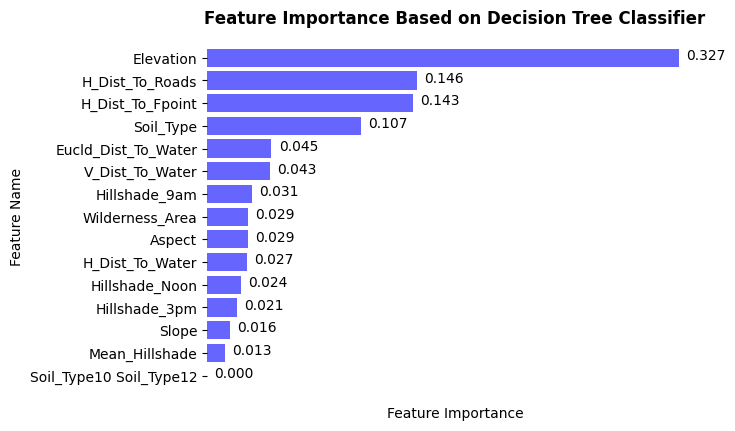

In [29]:
### Check #4
from sklearn.preprocessing import PolynomialFeatures
PolyFeat = PolynomialFeatures(2, interaction_only=True, include_bias=False)

selected_soil_types = []
for idx in [10, 12, 22, 4, 23, 39, 38, 2, 6, 40]:
    selected_soil_types.append('Soil_Type' + str(idx))

# Extract all necessary features for desired soil type DataFrames
df_soil_reduced = df_soil.loc[:,selected_soil_types] # Slice df_soil based on selected soil types from Check #3

# Create interaction terms between the importance selected soil types
X_interactions_reduced = PolyFeat.fit_transform(df_soil_reduced)
inter_feats_names = PolyFeat.get_feature_names_out(input_features=df_soil_reduced.columns)
df_soil_w_inters = pd.DataFrame(X_interactions_reduced, columns=inter_feats_names)

# Adding the interaction terms into the updated DataFrame (df_upd)
df_upd_w_inters = pd.concat([df_upd,df_soil_w_inters.drop(selected_soil_types,axis=1)],axis=1)

# Split training set from the new updated DataFrame and fit DTC model
X_train_df_upd_inters, X_rest_df_upd_inters, y_train_df_upd_inters, y_rest_df_upd_inters = train_test_split(df_upd_w_inters.drop('Cover_Type',axis=1),
                                                                                                            df_upd_w_inters['Cover_Type'], train_size=0.8)
DTC_ft_select_4 = DecisionTreeClassifier(random_state=42).fit(X_train_df_upd_inters,y_train_df_upd_inters)

# Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
feat_imp4 = pd.DataFrame(DTC_ft_select_4.feature_importances_, index=X_train_df_upd_inters.columns).reset_index()
feat_imp4.columns=['feature','importance']
feat_imp4 = feat_imp4.nlargest(15,columns='importance')
n_selected_feats = len(feat_imp4.feature)

# Set up barplot with 10 bars, with lengths corresponding to that of the scores under feat_imp DataFrame defined earlier
bars = plt.barh(np.arange(n_selected_feats),feat_imp4['importance'].iloc[::-1],color='blue',alpha=0.6)

# Display scores for each of the top 10 important features 
for bar,name,value in zip(bars, list(feat_imp4['feature'].iloc[::-1]), list(feat_imp4['importance'].iloc[::-1])):
    plt.text((bar.get_width()+0.005),(bar.get_y()+0.32),'{:.3f}'.format(value))

plt.xticks([]); plt.yticks(np.arange(n_selected_feats),feat_imp4['feature'].iloc[::-1])
sns.despine(top=True, bottom=True,left=True)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Based on Decision Tree Classifier',fontweight='bold')
plt.show()

OVERALL FINDINGS FROM SECTION 3
Wrapper-based Methods



Embedded Methods

Check 1:
- Soil_Type is, in fact, an important feature in making predictions
- Elevation has the highest importance among all other features
- Considering features where importance > 0.05, select [Elevation, H_Dist_To_Fpoint, H_Dist_To_Roads, Hillshade_9am, Soil_Type]

Check 2:
- Elevation, H_Dist_To_Fpoint and H_Dist_To_Roads undoubtedly have highest average importance among other features
- Soil Type 7, 15, 37 to be excluded (no information obtained under all continuous features)
- Considering features where importance > 0.05, select [Elevation, H_Dist_To_Fpoint, H_Dist_To_Roads, H_Dist_To_Water, Eucld_Dist_To_Water]

Check 3:
- Considering solely soil types, the following soil types are selected with importance > 0.05, [10, 12, 22, 4, 23, 39, 38, 2, 6, 40]
- Observing importance plots of chosen soil types, Elevation has highest average importance, followed by H_Dist_To_Fpoint and H_Dist_To_Roads
- Considering features where importance > 0.05, select [Elevation, H_Dist_To_Fpoint, H_Dist_To_Roads, V_Dist_To_Water, Eucld_Dist_To_Water, Wilderness_Area]

Check 4:
- Soil type interactions appear to not have any importance in making predictions towards cover type
- Only interaction between Soil_Type10 and Soil_Type12 is selected among top 15, yet has negligible importance
- Considering features where importance > 0.05, select [Elevation, H_Dist_To_Fpoint, H_Dist_To_Roads, Soil_Type]

In [90]:
final_selected_feats = ['Elevation', 'H_Dist_To_Roads', 'H_Dist_To_Fpoint', 'Soil_Type']

X_train_df_upd_imbal = X_train_df_upd_imbal.loc[:,final_selected_feats]
X_valid_df_upd_imbal = X_valid_df_upd_imbal.loc[:,final_selected_feats]
X_test_df_upd_imbal = X_test_df_upd_imbal.loc[:,final_selected_feats]

X_train_df_upd_bal = X_train_df_upd_imbal.loc[:,final_selected_feats]
X_valid_df_upd_bal = X_valid_df_upd_imbal.loc[:,final_selected_feats]
X_test_df_upd_bal = X_test_df_upd_imbal.loc[:,final_selected_feats]

df_upd = df_upd.loc[:,final_selected_feats]
df_upd['Cover_Type'] = df['Cover_Type']

### 4. Data Splitting & Resampling

Oversampling can be good for models that involve iteratively learning coefficients (ANN with SGD)

Oversampling can also be good for models that seek good data splits (SVM, DTC)

However, in case of severe label imbalance, can lead to increased generalization error, due to overfitting minority class

In [118]:
from imblearn.over_sampling import SMOTE
smote_object = SMOTE(random_state=42, k_neighbors=5)
SMOTE_X_train, SMOTE_y_Train = smote_object.fit_resample(X_train_df_upd_imbal,y_train_df_upd_imbal)

In [121]:
DTC_sampling1 = RandomForestClassifier(random_state=42)
DTC_sampling1.fit(SMOTE_X_train, SMOTE_y_Train)
ypreds1 = DTC_sampling1.predict(X_valid_df_upd_imbal)

In [125]:
print(f'SMOTE-Resampled Imbalanced Set Accuracy: {accuracy_score(y_valid_df_upd_imbal,ypreds1)}')
print(f"SMOTE-Resampled Imbalanced Set F-1 Score: {f1_score(y_valid_df_upd_imbal,ypreds1,average='macro')}")

SMOTE-Resampled Imbalanced Set Accuracy: 0.9371783618182131
SMOTE-Resampled Imbalanced Set F-1 Score: 0.8847860089400542


In [126]:
from imblearn.over_sampling import RandomOverSampler
ROS_object = RandomOverSampler(random_state=42)
ROS_X_train, ROS_y_train = ROS_object.fit_resample(X_train_df_upd_imbal,y_train_df_upd_imbal)

DTC_sampling2 = RandomForestClassifier(random_state=42)
DTC_sampling2.fit(ROS_X_train, ROS_y_train)
ypreds2 = DTC_sampling2.predict(X_valid_df_upd_imbal)

In [127]:
print(f'ROS-Resampled Imbalanced Set Accuracy: {accuracy_score(y_valid_df_upd_imbal,ypreds2)}')
print(f"ROS-Resampled Imbalanced Set F-1 Score: {f1_score(y_valid_df_upd_imbal,ypreds2,average='macro')}")

ROS-Resampled Imbalanced Set Accuracy: 0.9374193215263077
ROS-Resampled Imbalanced Set F-1 Score: 0.8785353327018506


In [129]:
from imblearn.under_sampling import RandomUnderSampler
RUS_object = RandomUnderSampler(random_state=42)
RUS_X_train, RUS_y_train = RUS_object.fit_resample(X_train_df_upd_imbal,y_train_df_upd_imbal)

DTC_sampling3 = RandomForestClassifier(random_state=42)
DTC_sampling3.fit(RUS_X_train, RUS_y_train)
ypreds3 = DTC_sampling3.predict(X_valid_df_upd_imbal)

In [130]:
print(f'RUS-Resampled Imbalanced Set Accuracy: {accuracy_score(y_valid_df_upd_imbal,ypreds3)}')
print(f"RUS-Resampled Imbalanced Set F-1 Score: {f1_score(y_valid_df_upd_imbal,ypreds3,average='macro')}")

RUS-Resampled Imbalanced Set Accuracy: 0.7397463038501919
RUS-Resampled Imbalanced Set F-1 Score: 0.6674574364049476


In [135]:
from imblearn.pipeline import Pipeline
def hybrid_SMOTE_RUS_sampling(X_train, y_train, over_sampling_ratio=None, under_sampling_ratio=None):
    """
    Custom hybrid over-under sampling method for multiclass labels.

    Parameters:
    - X_train: Input features of the training set.
    - y_train: Target labels of the training set.
    - over_sampling_ratio: Dictionary specifying the ratio for over-sampling for each class.
    - under_sampling_ratio: Dictionary specifying the ratio for under-sampling for each class.

    Returns:
    - X_resampled: Resampled features.
    - y_resampled: Resampled labels.
    """

    # Define over-sampling and under-sampling strategies
    if over_sampling_ratio:
        over_sampler = SMOTE(sampling_strategy=over_sampling_ratio,random_state=42)
    else:
        over_sampler = SMOTE(random_state=42)
    
    if under_sampling_ratio:
        under_sampler = RandomUnderSampler(sampling_strategy=under_sampling_ratio,random_state=42)
    else:
        under_sampler = RandomUnderSampler(random_state=42)

    # Define the hybrid resampling pipeline
    pipeline = Pipeline([
        ('over_sampling', over_sampler),
        ('under_sampling', under_sampler)
    ])

    # Fit the pipeline to the training data and apply the transformation
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

In [139]:
df_upd_y.value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [137]:
SMOTE_RUS_X_train, SMOTE_RUS_y_train = hybrid_SMOTE_RUS_sampling(X_train_df_upd_imbal,y_train_df_upd_imbal,
                                                                 over_sampling_ratio={1: , 2: , 3: , 4: , 5: , 6: , 7: }, 
                                                                 under_sampling_ratio={0: 200, 1: 100, 2: 160})
DTC_sampling4 = RandomForestClassifier(random_state=42)
DTC_sampling4.fit(SMOTE_RUS_X_train, SMOTE_RUS_y_train)
ypreds4 = DTC_sampling4.predict(X_valid_df_upd_imbal)

ValueError: The {0} target class is/are not present in the data.

In [ ]:
print(f'SMOTE-RUS-Resampled Imbalanced Set Accuracy: {accuracy_score(y_valid_df_upd_imbal,ypreds4)}')
print(f"SMOTE-RUS-Resampled Imbalanced Set F-1 Score: {f1_score(y_valid_df_upd_imbal,ypreds4,average='macro')}")

In [132]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

model = RandomForestClassifier(random_state=42)
# define resampling
over = RandomOverSampler(random_state=42)
under = RandomUnderSampler(random_state=42)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X_train_df_upd_imbal,y_train_df_upd_imbal, scoring='roc_auc', cv=cv, n_jobs=-1)

KeyboardInterrupt: 

In [39]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [40]:
from imblearn.pipeline import Pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [42]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)


### Can consider making custom SFFS method using RepeatedStratifiedKFold

F1 Score: 0.996


### 5. Model Training & Evaluation

Creating custom 7x7 confusion and cost matrix functions for evaluating metrics after classifications

In [126]:
def confusion_matrix_7by7(y_true, y_pred):
    unique_labels = sorted(np.unique(y_true))
    num_classes = len(unique_labels)
    cm = np.zeros((num_classes, num_classes))

    for true_label, pred_label in zip(y_true, y_pred):
        cm[int(true_label)-1, int(pred_label)-1] += 1
    ''' This pairs up the y_true and y_pred with each other. Then based on their value, a one is added to their corresponding index in 
        matrix. This removes the need to manually sift through each pair of correctly- and wrongly-classified labels.'''
    return pd.DataFrame(cm, index=unique_labels, columns=unique_labels).map(int)


default_cost_matrix = np.array([[0,1,2,3,4,5,6],
                                [1,0,1,2,3,4,5],
                                [2,1,0,1,2,3,4],
                                [3,2,1,0,1,2,3],
                                [4,3,2,1,0,1,2],
                                [5,4,3,2,1,0,1],
                                [6,5,4,3,2,1,0]])
def cost_matrix_7by7(y_true, y_pred, cost_matrix=default_cost_matrix):
    unique_labels = sorted(np.unique(y_true))
    num_classes = len(cost_matrix)
    cost_matrix_result = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            # Compute the cost based on misclassifications
            cost_matrix_result[i, j] = cost_matrix[i, j] * np.sum((y_true == i+1) & (y_pred == j+1))
    return pd.DataFrame(cost_matrix_result, index=unique_labels, columns=unique_labels).map(int)

In [119]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# General test of DTC on all features without further addition of interaction terms or feature reduction
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
ypred_DTC = DTC.predict(X_valid)

In [125]:
#DTC accuracy and f1-score
print(f'Accuracy (DTC): {accuracy_score(y_valid,ypred_DTC)}')
print(f"F1-score (DTC): {f1_score(y_valid,ypred_DTC,average='weighted')}")
confusion_matrix_7by7(ypred_DTC,y_valid)

Accuracy (DTC): 0.7979220779220779
F1-score (DTC): 0.7967497941845691
7x7 Confusion Matrix


1    2    3    4    5    6    7
1  186   58    0    0    7    2   14
2   58  173    7    0   20    7    3
3    0   11  210    7    6   42    0
4    0    0   11  263    0    8    0
5    9   23    6    0  238    8    0
6    1    8   41    5    4  208    0
7   21    2    0    0    0    0  258

Choose up to Soil_Type40

Can consider the following 10 continuous features to implement in prediction model. Potentially introduces a decent amount of noise to ensure reliable label predictions.

Selected soil types to mainly consider: 3, 4, 10, 39, 38 (others to be excluded, handles high dimensionality better)

### Testing ONLY Soil Types in predictions

In [26]:
### DataFrame splits ensuring equal label proportions in training and validation sets
# Identify the target label of smallest proportion
print(df_soil_w_inters['Cover_Type'].value_counts())

# Extract observations with label of smallest proportion (Cover_Type==4)
grp4_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==4]

# Split observations into 80/10/10  proportions
grp4_soil_train, grp4_soil_valid, grp4_soil_test = np.split(grp4_soil, [int(0.8*len(grp4_soil)),int(0.9*len(grp4_soil))])

# Identify length of grp4_train & grp4_valid to have even number of observations from other groups for model training and evaluation
print(f'\nObservations from Cover_Type4 for model training: {len(grp4_soil_train)}')
print(f'Observations from Cover_Type4 for model validation: {len(grp4_soil_valid)}')

# Obtain the observations from remaining Cover_Types for splitting into training, validation and test sets
grp1_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==1]
grp2_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==2]
grp3_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==3]
grp5_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==5]
grp6_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==6]
grp7_soil = df_soil_w_inters.loc[df_soil_w_inters['Cover_Type']==7]

# Defining the training, validation and test sets
train_soil = pd.DataFrame(); valid_soil = pd.DataFrame(); test_soil = pd.DataFrame()
groups = [grp1_soil, grp2_soil, grp3_soil, grp4_soil, grp5_soil, grp6_soil, grp7_soil]

for i, dataframe in enumerate(groups):
    # Obtain the indices of the dataframe based on its given Cover_Type value
    total_numbers = sorted(dataframe.index.values)

    # Randomly sample numbers for training set, append corresponding observations into final training set
    random.seed(42)
    train_indices = random.sample(total_numbers, len(grp4_soil_train))
    train_soil = pd.concat([train_soil, dataframe.loc[train_indices]], ignore_index=True)

    # Create a list of leftover indices to split further into validation and test sets
    leftover_indices = [num for num in total_numbers if num not in train_indices]

    # Randomly sample numbers for validation set, append corresponding observations into final validation set
    random.seed(42)
    valid_indices = random.sample(leftover_indices, len(grp4_soil_valid))
    valid_soil = pd.concat([valid_soil, dataframe.loc[valid_indices]], ignore_index=True)

    # Leftover numbers are assigned to the test set, append corresponding observations into the final test set
    test_indices = [num for num in leftover_indices if num not in valid_indices]
    test_soil = pd.concat([test_soil, dataframe.loc[test_indices]], ignore_index=True)

    # Print number of observations elements of the sampled and remainder lists for verification
    print(f'Cover Type {i+1}')
    print(f"Training Set: {len(train_indices)}")
    print(f"Validation Set: {len(valid_indices)}")
    print(f"Test Set: {len(test_indices)}\n")

# Shuffle observations in newly-updated training, validation, and test sets
train_soil = train_soil.sample(frac=1,random_state=42)
valid_soil = valid_soil.sample(frac=1,random_state=42)
test_soil = test_soil.sample(frac=1,random_state=42)
### NOTE: Validation set does not necessarily need to be balanced, as it is just supposed to 'mimic' the test data...

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


/Applications/anaconda3/envs/fyp/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Observations from Cover_Type4 for model training: 2197
Observations from Cover_Type4 for model validation: 275
Cover Type 1
Training Set: 2197
Validation Set: 275
Test Set: 209368

Cover Type 2
Training Set: 2197
Validation Set: 275
Test Set: 280829

Cover Type 3
Training Set: 2197
Validation Set: 275
Test Set: 33282

Cover Type 4
Training Set: 2197
Validation Set: 275
Test Set: 275

Cover Type 5
Training Set: 2197
Validation Set: 275
Test Set: 7021

Cover Type 6
Training Set: 2197
Validation Set: 275
Test Set: 14895

Cover Type 7
Training Set: 2197
Validation Set: 275
Test Set: 18038



In [27]:
# Original DataFrame of soil types
df_soil_w_inters_X = df_soil_w_inters.drop('Cover_Type', axis=1); df_soil_w_inters_y = df_soil_w_inters['Cover_Type']

# Dimension-reduced DataFrame of soil types
df_soil_reduced_X = soil_df_reduced.drop('Cover_Type', axis=1); df_soil_reduced_y = soil_df_reduced['Cover_Type']

# Balanced DataFrame of soil types w/ interactions
X_train_soil_balanced = train_soil.drop('Cover_Type',axis=1); y_train_soil_balanced = train_soil['Cover_Type']
X_valid_soil_balanced = valid_soil.drop('Cover_Type',axis=1); y_valid_soil_balanced = valid_soil['Cover_Type']
X_test_soil_balanced = test_soil.drop('Cover_Type',axis=1); y_test_soil_balanced = test_soil['Cover_Type']

# Unbalanced, all soil types and pairwise interactions
X_train_soil, X_temp_soil, y_train_soil, y_temp_soil = train_test_split(df_soil_w_inters_X,df_soil_w_inters_y,train_size=0.7,random_state=42)
X_valid_soil, X_test_soil, y_valid_soil, y_test_soil = train_test_split(X_temp_soil,y_temp_soil,test_size=0.3333,random_state=42)

# Unbalanced, reduced dimensions
X_train_soil_reduced, X_temp_soil_reduced, y_train_soil_reduced, y_temp_soil_reduced = train_test_split(df_soil_reduced_X,df_soil_reduced_y,train_size=0.8,random_state=42)
X_valid_soil_reduced, X_test_soil_reduced, y_valid_soil_reduced, y_test_soil_reduced = train_test_split(X_temp_soil_reduced,y_temp_soil_reduced,test_size=0.5,random_state=42)

# Calculating class weights (only for unbalanced label cases)
unique_labels = sorted(df['Cover_Type'].unique()); unique_labels_str = list(map(str, unique_labels))
class_counts_soil = y_train_soil.value_counts().values
class_counts_soil_reduced = y_train_soil_reduced.value_counts().values
class_weights_soil = {label: 1 / count for label, count in zip(unique_labels,class_counts_soil)}
class_weights_soil_reduced = {label: 1 / count for label, count in zip(unique_labels,class_counts_soil_reduced)}

ROS, RUS and SMOTE could not be utilized in re-balancing the labels due to the large number of observations AND high dimensionality of features. Had to resort to manual resampling similar to that done for all features (w/out soil type pairwise interaction terms)

In [28]:
# DTC model testing for all soil types DataFrame
DTC_soil1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
DTC_soil1.fit(X_train_soil,y_train_soil)
ypred_soil_DTC = DTC_soil1.predict(X_valid_soil)
print(f'Accuracy (DTC soils & inters, unbalanced): {accuracy_score(y_valid_soil,ypred_soil_DTC)}')
print(f"F1-score (DTC soils & inters, unbalanced): {f1_score(y_valid_soil,ypred_soil_DTC,average='weighted')}\n")
confusion_matrix_7by7(ypred_soil_DTC,y_valid_soil)

Accuracy (DTC soils & inters, unbalanced): 0.6140541098719537
F1-score (DTC soils & inters, unbalanced): 0.5810862959762355



1      2     3  4  5   6    7
1  19568  22517   221  0  0   0  197
2   8380  44859  3344  0  0   0    8
3      0    456  6612  0  0  25    0
4      0    104   411  0  0  26    0
5    178   1541   247  0  0   0    0
6     34    654  2709  0  0  65    0
7   3236    545    17  0  0   0  254

In [29]:
DTC_soil2 = DecisionTreeClassifier(criterion='entropy', class_weight=class_weights_soil,random_state=42)
DTC_soil2.fit(X_train_soil,y_train_soil)
ypred_soil_DTC = DTC_soil2.predict(X_valid_soil)
print(f'Accuracy (DTC soils & inters, unbalanced, weighted): {accuracy_score(y_valid_soil,ypred_soil_DTC)}')
print(f"F1-score (DTC soils & inters, unbalanced, weighted): {f1_score(y_valid_soil,ypred_soil_DTC,average='weighted')}\n")
confusion_matrix_7by7(ypred_soil_DTC,y_valid_soil)

Accuracy (DTC soils & inters, unbalanced, weighted): 0.3132830786176511
F1-score (DTC soils & inters, unbalanced, weighted): 0.359699195258049



1      2     3  4     5     6      7
1  5568   9023    33  0  2017  1295  24567
2  1829  20703  1025  0  6972  5693  20369
3     0      0  2906  0     8  4154     25
4     0      0   255  0     0   286      0
5    13    260   185  0   743   331    434
6     0      0   441  0   134  2691    196
7    28    168    17  0    44     0   3795

In [30]:
DTC_soil3 = DecisionTreeClassifier(criterion='entropy',random_state=42)
DTC_soil3.fit(X_train_soil_balanced,y_train_soil_balanced)
ypred_soil_DTC = DTC_soil3.predict(X_valid_soil_balanced)
print(f'Accuracy (DTC soils & inters, manually balanced): {accuracy_score(y_valid_soil_balanced,ypred_soil_DTC)}')
print(f"F1-score (DTC soils & inters, manually balanced): {f1_score(y_valid_soil_balanced,ypred_soil_DTC,average='weighted')}\n")
confusion_matrix_7by7(ypred_soil_DTC,y_valid_soil_balanced)

Accuracy (DTC soils & inters, manually balanced): 0.545974025974026
F1-score (DTC soils & inters, manually balanced): 0.544920847245109



1    2   3    4    5    6    7
1  113  110   0    0   18    1   33
2   47  152   7    6   54    8    1
3    0    2  97   69    7  100    0
4    0    0  51  190    3   31    0
5   33   61  33   16  126    6    0
6    3   11  53   35   20  153    0
7   20   28   2    0    5    0  220

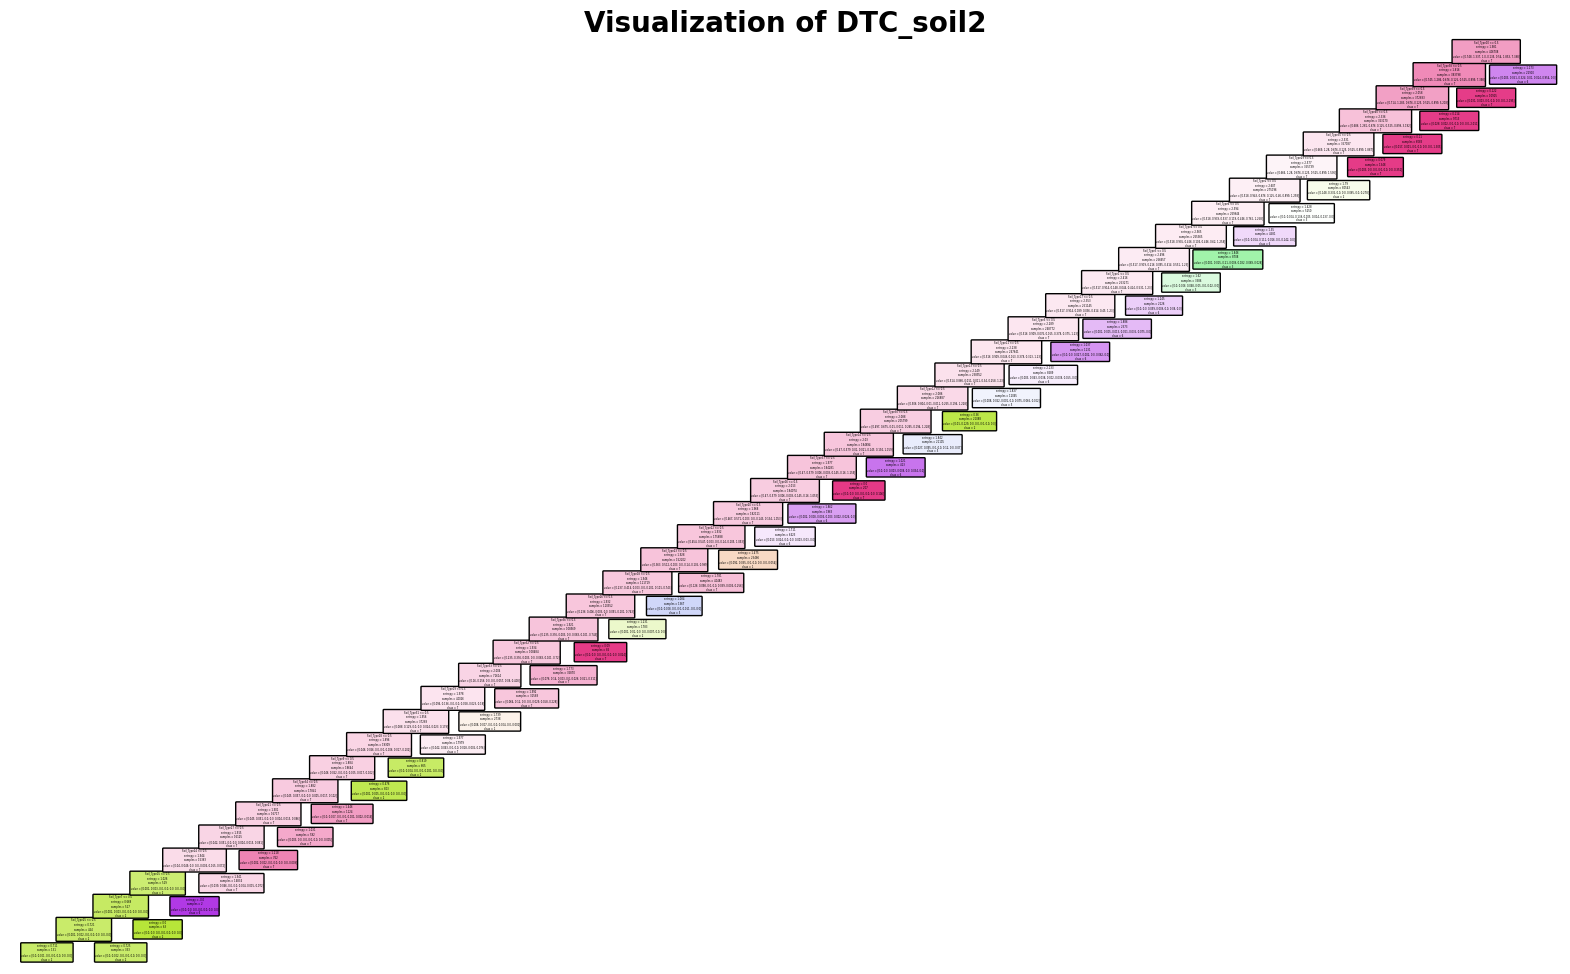

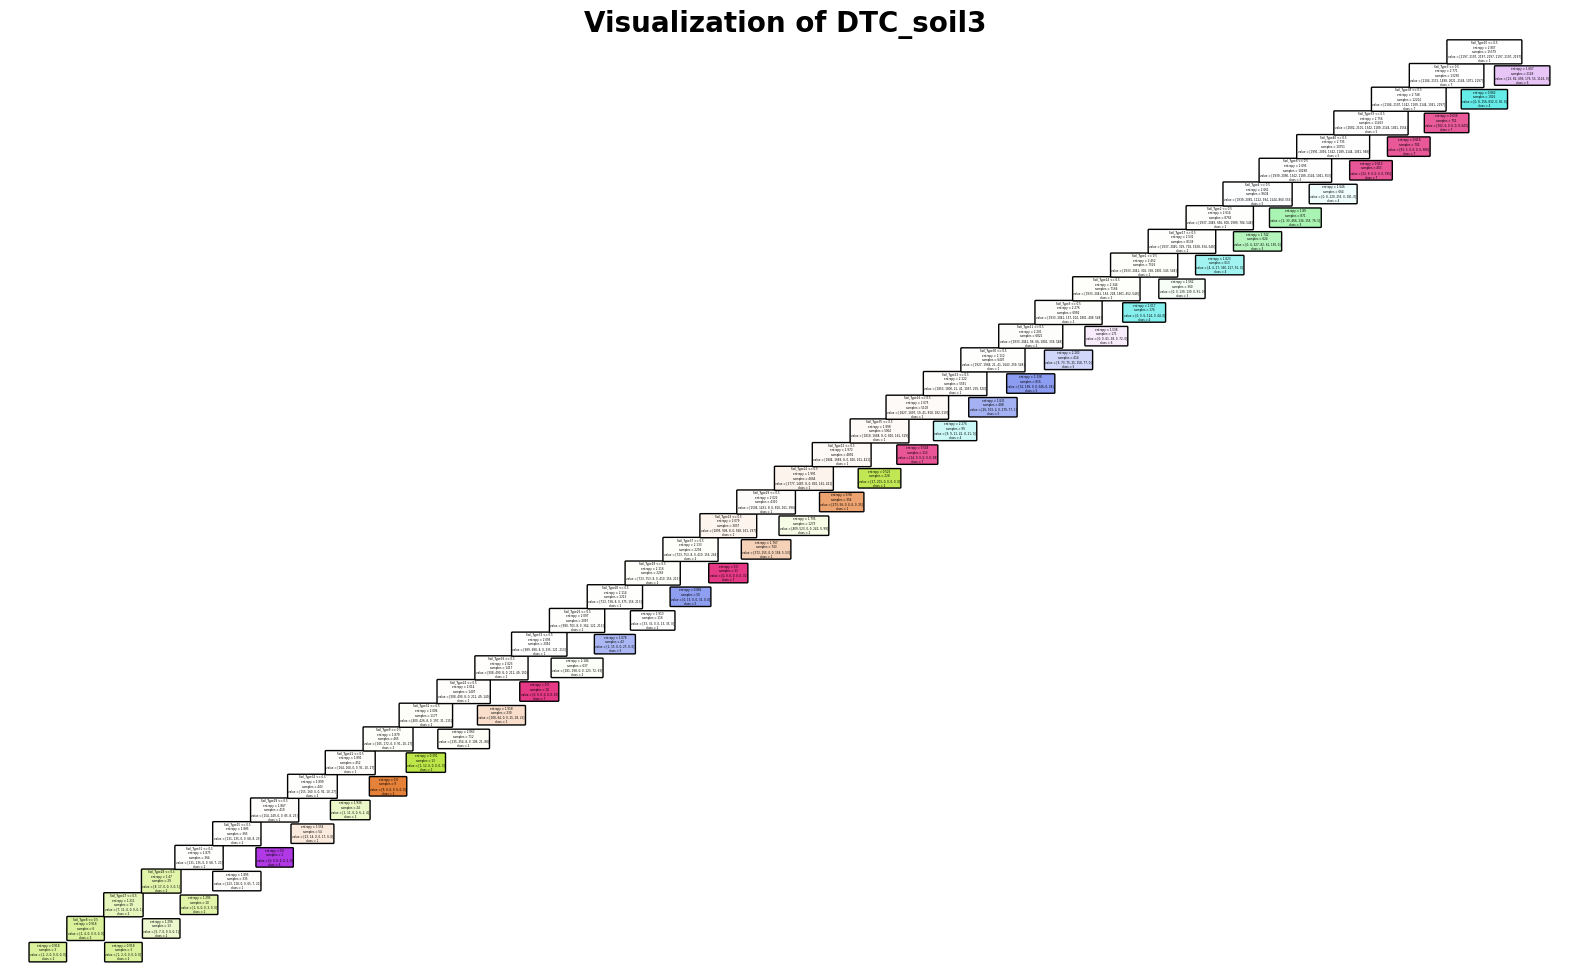

In [31]:
for i, model in enumerate([DTC_soil1, DTC_soil2, DTC_soil3]):
    plt.figure(figsize=(20,12))
    plot_tree(model, filled=True, feature_names=list(soil_df.columns), class_names=unique_labels_str, rounded=True)
    plt.title(f'Visualization of DTC_soil{i+1}',fontweight='bold',fontsize=20)
    plt.show()

Conducting DTC predictions on the soil type dataset with interaction terms is not feasible at all. The DTC is severely overfit, need to consider an alternative approach.

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

ROS_X_train_reduced, ROS_y_train_reduced = ros.fit_resample(X_train_soil_reduced,y_train_soil_reduced)
RUS_X_train_reduced, RUS_y_train_reduced = rus.fit_resample(X_train_soil_reduced,y_train_soil_reduced)
SMOTE_X_train_reduced, SMOTE_y_train_reduced = smote.fit_resample(X_train_soil_reduced,y_train_soil_reduced)

In [32]:
DTC_soil1_reduced = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
DTC_soil1_reduced.fit(X_train_soil_reduced,y_train_soil_reduced)
ypred_soil_DTC = DTC_soil1_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, unbalanced): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, unbalanced): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}\n")
confusion_matrix_7by7(ypred_soil_DTC,y_valid_soil_reduced)

Accuracy (DTC reduced soils & inters, unbalanced): 0.5241205424755611
F1-score (DTC reduced soils & inters, unbalanced): 0.4119210209910024



1      2     3  4  5  6  7
1  3365  38917   221  0  0  0  0
2   245  53338  3008  0  0  0  0
3     0   2889  4204  0  0  0  0
4     0    258   283  0  0  0  0
5     0   1778   188  0  0  0  0
6     0   1585  1877  0  0  0  0
7  2300   1735    17  0  0  0  0

In [33]:
# DTC model testing for reduced soil types DataFrame
DTC_soil1_reduced = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
DTC_soil1_reduced.fit(X_train_soil_reduced,y_train_soil_reduced)
ypred_soil_DTC = DTC_soil1_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, unbalanced): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, unbalanced): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}\n")

DTC_soil2_reduced = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
DTC_soil2_reduced.fit(ROS_X_train_reduced,ROS_y_train_reduced)
ypred_soil_DTC = DTC_soil2_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, balanced w/ ROS): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, balanced w/ ROS): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}\n")

DTC_soil3_reduced = DecisionTreeClassifier(criterion='entropy', class_weight=class_weights_soil_reduced,random_state=42, max_depth=5)
DTC_soil3_reduced.fit(X_train_soil_reduced,y_train_soil_reduced)
ypred_soil_DTC = DTC_soil3_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, unbalanced, weighted): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, unbalanced, weighted): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}\n")

DTC_soil4_reduced = DecisionTreeClassifier(criterion='entropy', class_weight=class_weights_soil_reduced,random_state=42, max_depth=5)
DTC_soil4_reduced.fit(RUS_X_train_reduced,RUS_y_train_reduced)
ypred_soil_DTC = DTC_soil4_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, balanced w/ RUS): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, balanced w/ RUS): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}\n")

DTC_soil5_reduced = DecisionTreeClassifier(criterion='entropy', class_weight=class_weights_soil_reduced,random_state=42, max_depth=5)
DTC_soil5_reduced.fit(SMOTE_X_train_reduced,SMOTE_y_train_reduced)
ypred_soil_DTC = DTC_soil5_reduced.predict(X_valid_soil_reduced)
print(f'Accuracy (DTC reduced soils & inters, balanced w/ SMOTE): {accuracy_score(y_valid_soil_reduced,ypred_soil_DTC)}')
print(f"F1-score (DTC reduced soils & inters, balanced w/ SMOTE): {f1_score(y_valid_soil_reduced,ypred_soil_DTC,average='weighted')}")

Accuracy (DTC reduced soils & inters, unbalanced): 0.5241205424755611
F1-score (DTC reduced soils & inters, unbalanced): 0.4119210209910024

Accuracy (DTC reduced soils & inters, balanced w/ ROS): 0.507761944100234
F1-score (DTC reduced soils & inters, balanced w/ ROS): 0.377047752685426

Accuracy (DTC reduced soils & inters, unbalanced, weighted): 0.06593349855431639
F1-score (DTC reduced soils & inters, unbalanced, weighted): 0.03521418165567847

Accuracy (DTC reduced soils & inters, balanced w/ RUS): 0.06370473633484786
F1-score (DTC reduced soils & inters, balanced w/ RUS): 0.03280009798023469

Accuracy (DTC reduced soils & inters, balanced w/ SMOTE): 0.06370473633484786
F1-score (DTC reduced soils & inters, balanced w/ SMOTE): 0.03280009798023469


Poor performance upon applying ROS, RUS and SMOTE on the reduced dataset with 5 soil types. Severe introduction of noise from imputation of the 3 objects during resampling. May need to consider choosing more soil types, even if the DTC feature importance is not highly significant.

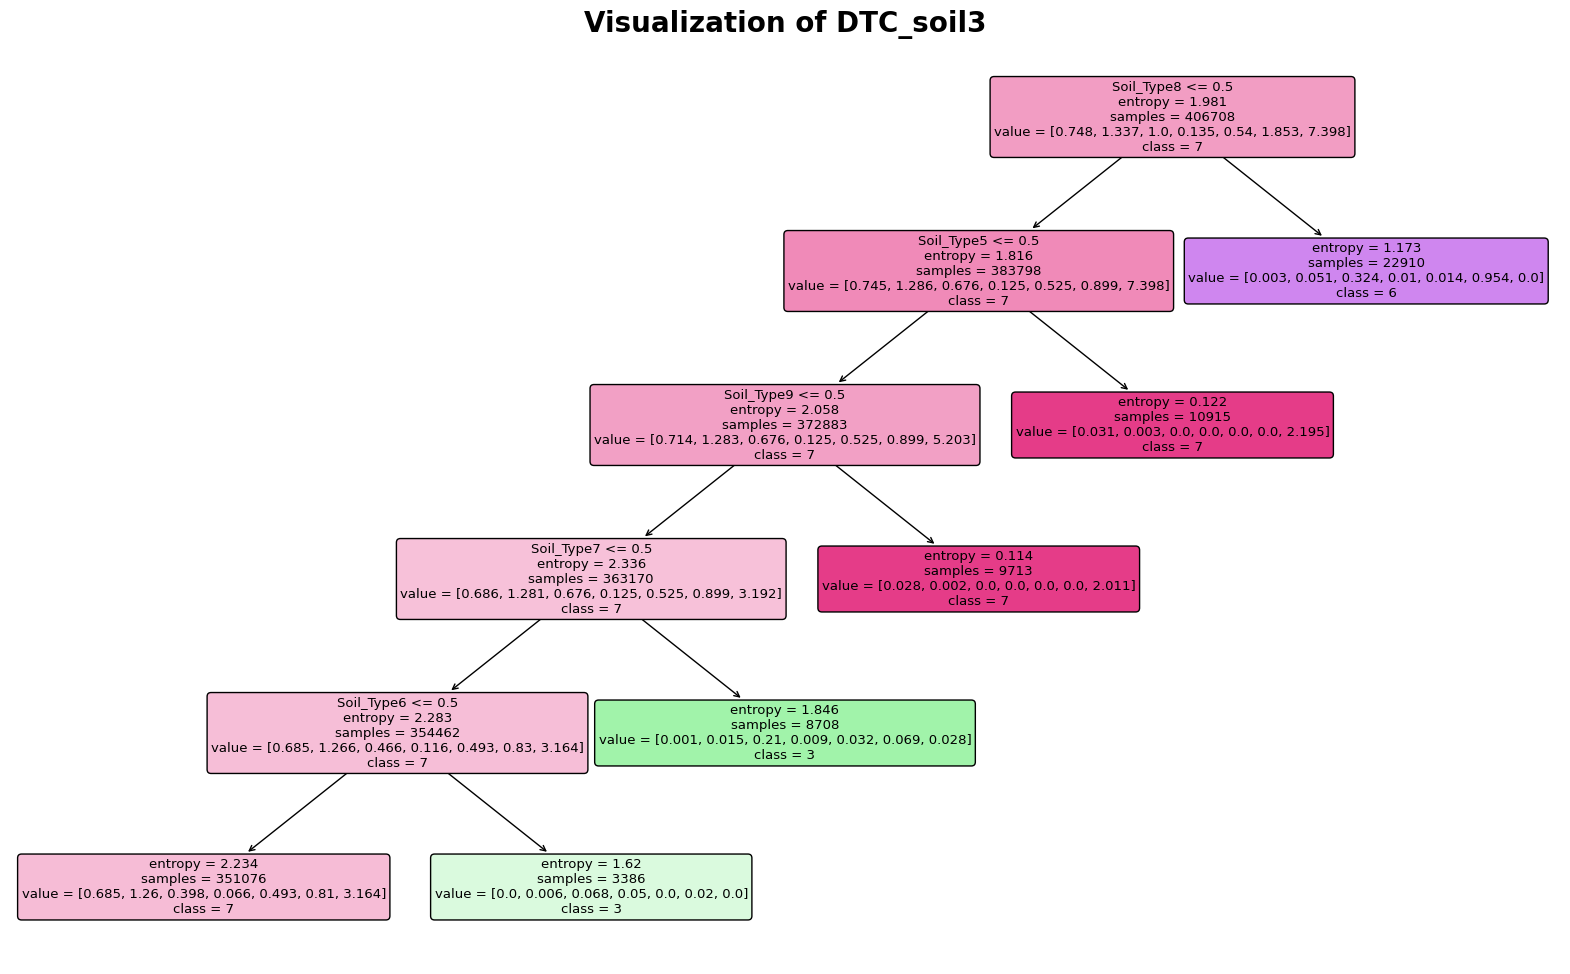

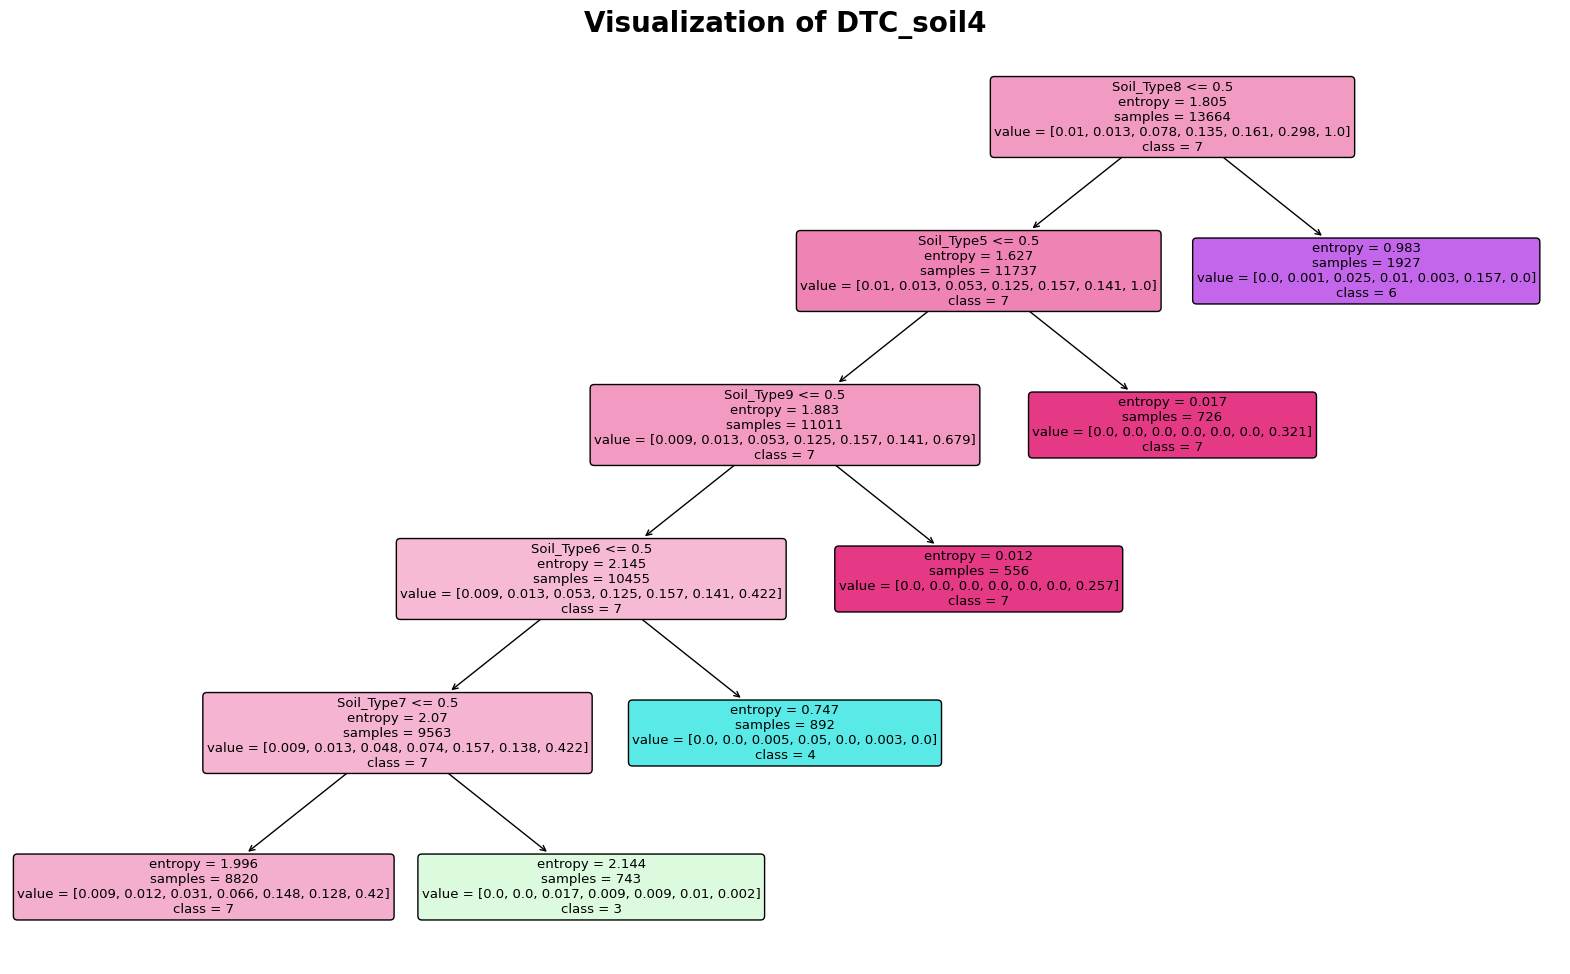

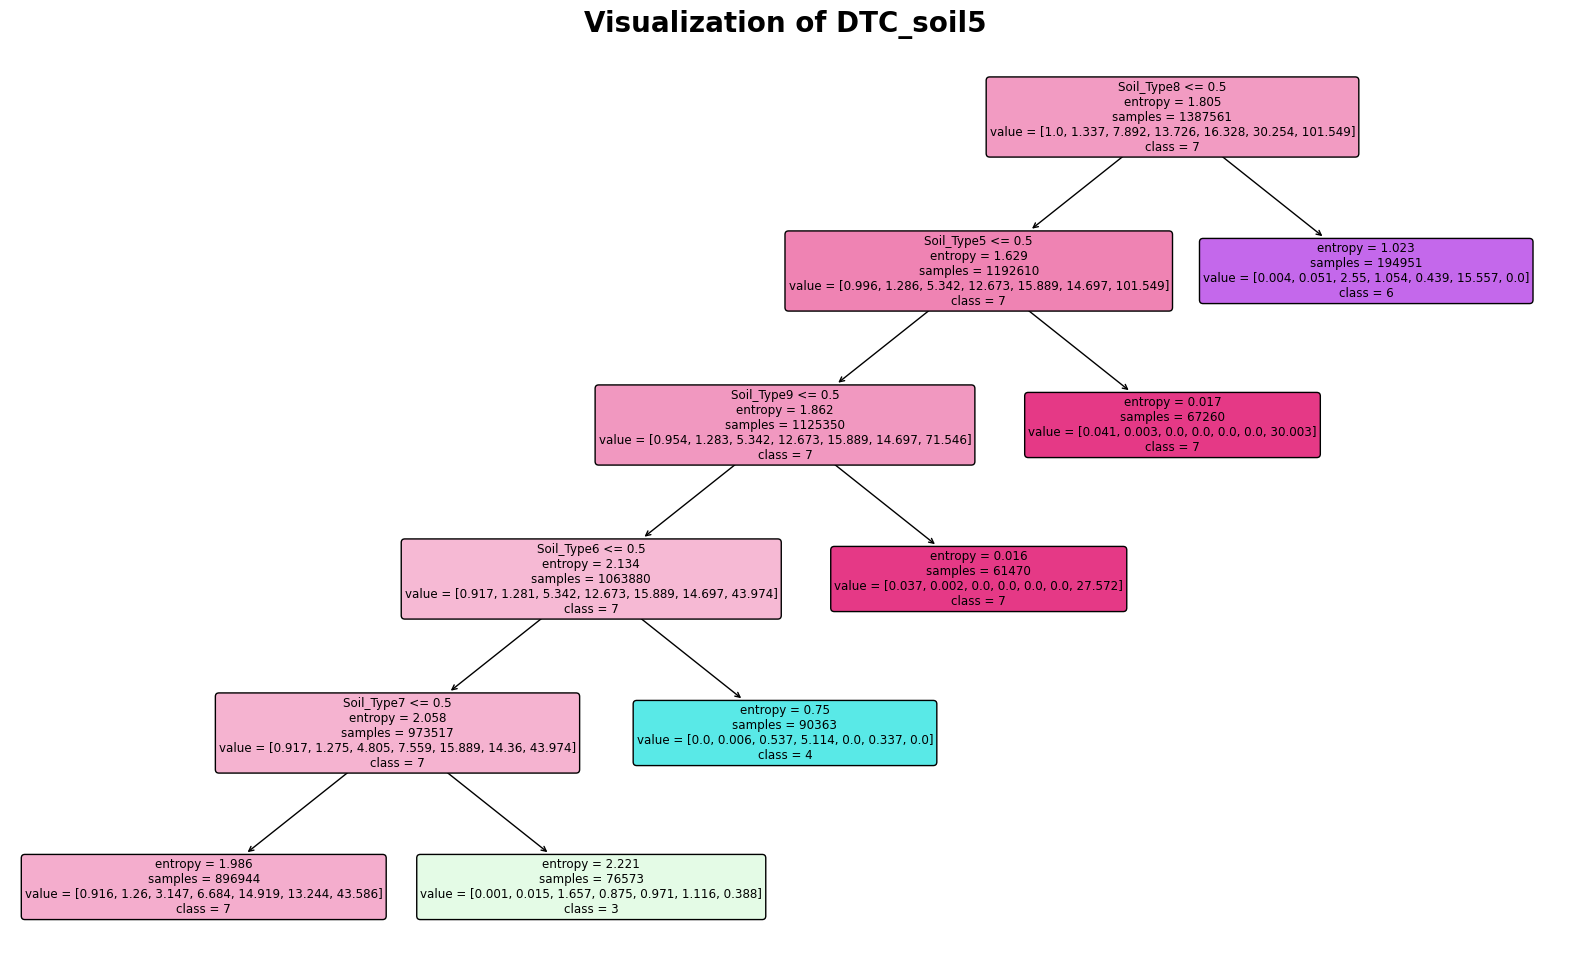

In [35]:
for i, model in enumerate([DTC_soil1_reduced, DTC_soil2_reduced, DTC_soil3_reduced, DTC_soil4_reduced, DTC_soil5_reduced]):
    plt.figure(figsize=(20,12))
    plot_tree(model, filled=True, feature_names=list(soil_df.columns), class_names=unique_labels_str, rounded=True)
    plt.title(f'Visualization of DTC_soil{i+1}',fontweight='bold',fontsize=20)
    plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
MLR_soil1 = LogisticRegression(penalty=None, multi_class='multinomial', class_weight=class_weights_soil, random_state=42)
MLR_soil1.fit(X_train_soil,y_train_soil)
ypred_soil_MLR = MLR_soil1.predict(X_valid_soil)
print(f'Accuracy (MLR reduced soils & inters, unbalanced): {accuracy_score(y_valid_soil,ypred_soil_MLR)}')
print(f"F1-score (MLR reduced soils & inters, unbalanced): {f1_score(y_valid_soil,ypred_soil_MLR,average='weighted')}\n")

/Applications/anaconda3/envs/fyp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (MLR reduced soils & inters, unbalanced): 0.3132830786176511
F1-score (MLR reduced soils & inters, unbalanced): 0.359699195258049



In [64]:
from sklearn.linear_model import LogisticRegression
MLR_soil1 = LogisticRegression(penalty=None, multi_class='multinomial', class_weight=class_weights_soil, random_state=42)
MLR_soil1.fit(X_train_soil_reduced,y_train_soil_reduced)
ypred_soil_MLR = MLR_soil1.predict(X_valid_soil_reduced)
print(f'Accuracy (MLR reduced soils & inters, unbalanced): {accuracy_score(y_valid_soil,ypred_soil_MLR)}')
print(f"F1-score (MLR reduced soils & inters, unbalanced): {f1_score(y_valid_soil,ypred_soil_MLR,average='weighted')}\n")

Accuracy (MLR reduced soils & inters, unbalanced): 0.06593349855431639
F1-score (MLR reduced soils & inters, unbalanced): 0.03521418165567847



/Applications/anaconda3/envs/fyp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
full_X = pd.concat([X_train, X_valid,X_test],axis=0); full_y = pd.concat([y_train, y_valid,y_test],axis=0)
unbalanced_Xtrain, unbalanced_Xtemp, unbalanced_ytrain, unbalanced_ytemp = train_test_split(full_X, full_y, train_size=0.7,random_state=42)
unbalanced_Xvalid, unbalanced_Xtest, unbalanced_yvalid, unbalanced_ytest = train_test_split(unbalanced_Xtemp, unbalanced_ytemp, train_size=0.3333,random_state=42)

In [35]:
DTC_unbalanced = DecisionTreeClassifier(random_state=42)
DTC_unbalanced.fit(unbalanced_Xtrain,unbalanced_ytrain)
ypred_DTC = DTC_unbalanced.predict(unbalanced_Xvalid)
print(f'Accuracy (DTC): {accuracy_score(unbalanced_yvalid,ypred_DTC)}')
print(f"F1-score (DTC): {f1_score(unbalanced_yvalid,ypred_DTC,average='weighted')}")
confusion_matrix_7by7(ypred_DTC,unbalanced_yvalid)

### Model overfitted (check tree plot and at different max_depth)

Accuracy (DTC): 0.930303812720544
F1-score (DTC): 0.9302772927588322


1      2     3    4    5     6     7
1  19782   1281     1    0   14     4   122
2   1403  26563    98    0  133    64    14
3      3     74  3282   28   11   171     0
4      0      1    51  213    0    17     0
5     21    146     9    0  778     5     0
6      1     70   161    9    4  1472     0
7    121     12     0    0    0     0  1956

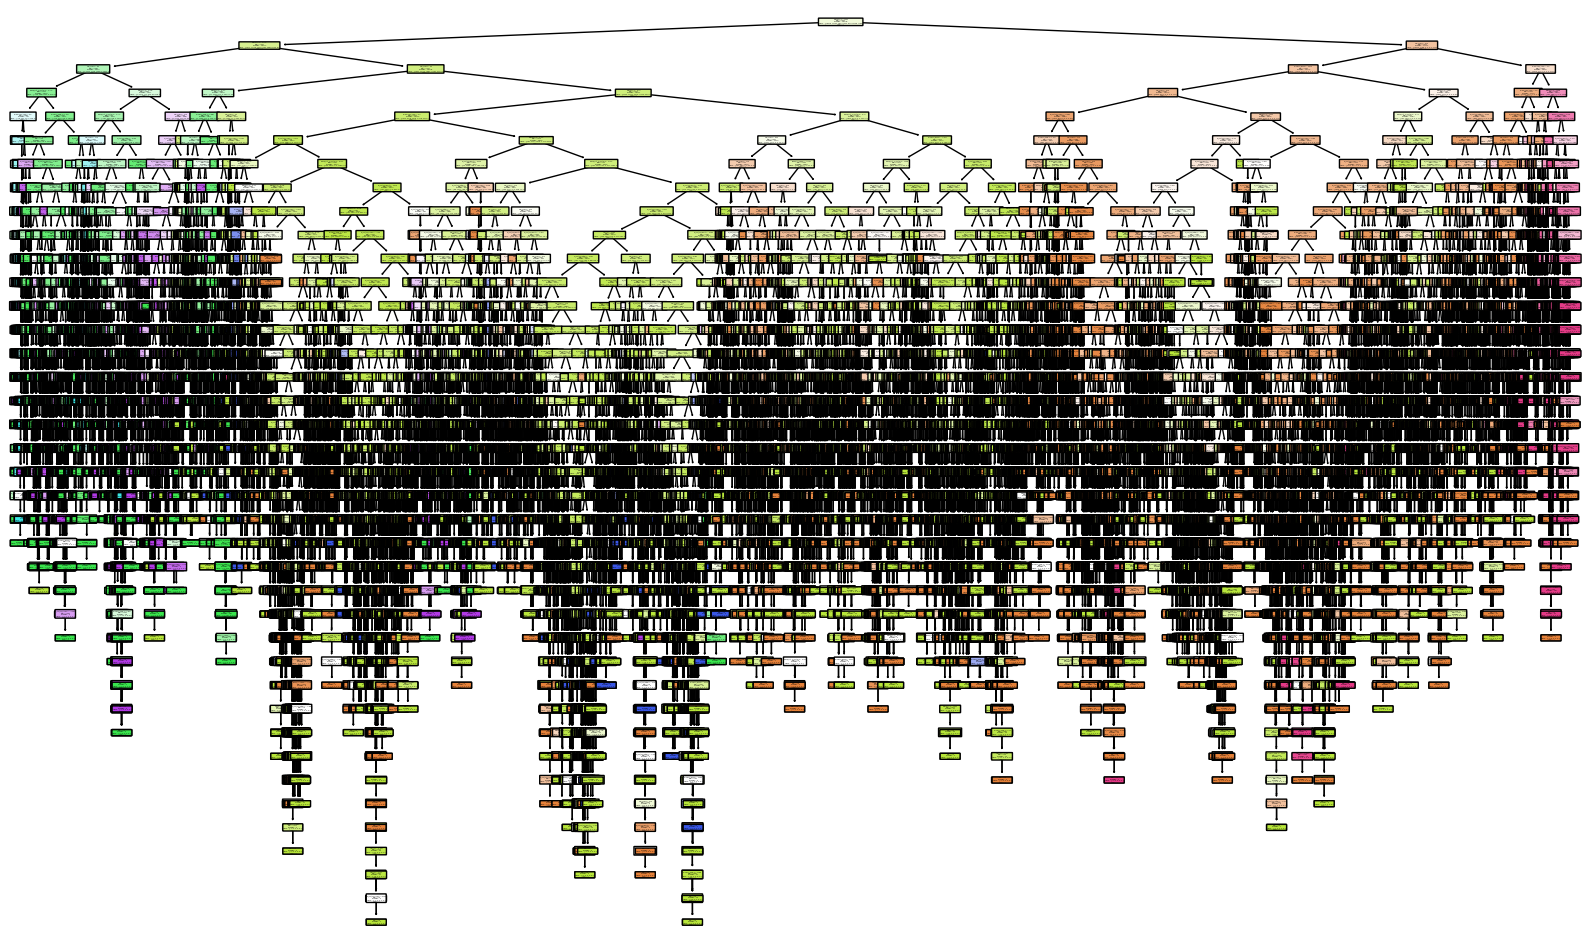

In [35]:
plt.figure(figsize=(20,12))
plot_tree(DTC_unbalanced, filled=True, feature_names=list(unbalanced_Xtrain.columns), class_names=unique_labels_str, rounded=True)
plt.show()

In [135]:
temp_set = full_df.loc[full_df['Soil_Type']==1]
    
X_soilbased_select = temp_set.drop('Cover_Type',axis=1)
y_soilbased_select = temp_set['Cover_Type']

select_Xtrain, select_Xrest, select_ytrain, select_yrest = train_test_split(X_soilbased_select,y_soilbased_select,random_state=42,train_size=0.7)

# Establish Decision Tree Classifier for identifying feature importance
soilbased_select_DTC = DecisionTreeClassifier(max_depth = 8,random_state=42).fit(select_Xtrain,select_ytrain,)

# Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
feat_imp=pd.DataFrame(soilbased_select_DTC.feature_importances_, index=select_Xtrain.columns).reset_index()
feat_imp.columns=['feature','importance']
feat_imp = feat_imp.nlargest(10,columns='importance')
n_selected_feats = len(feat_imp.feature)



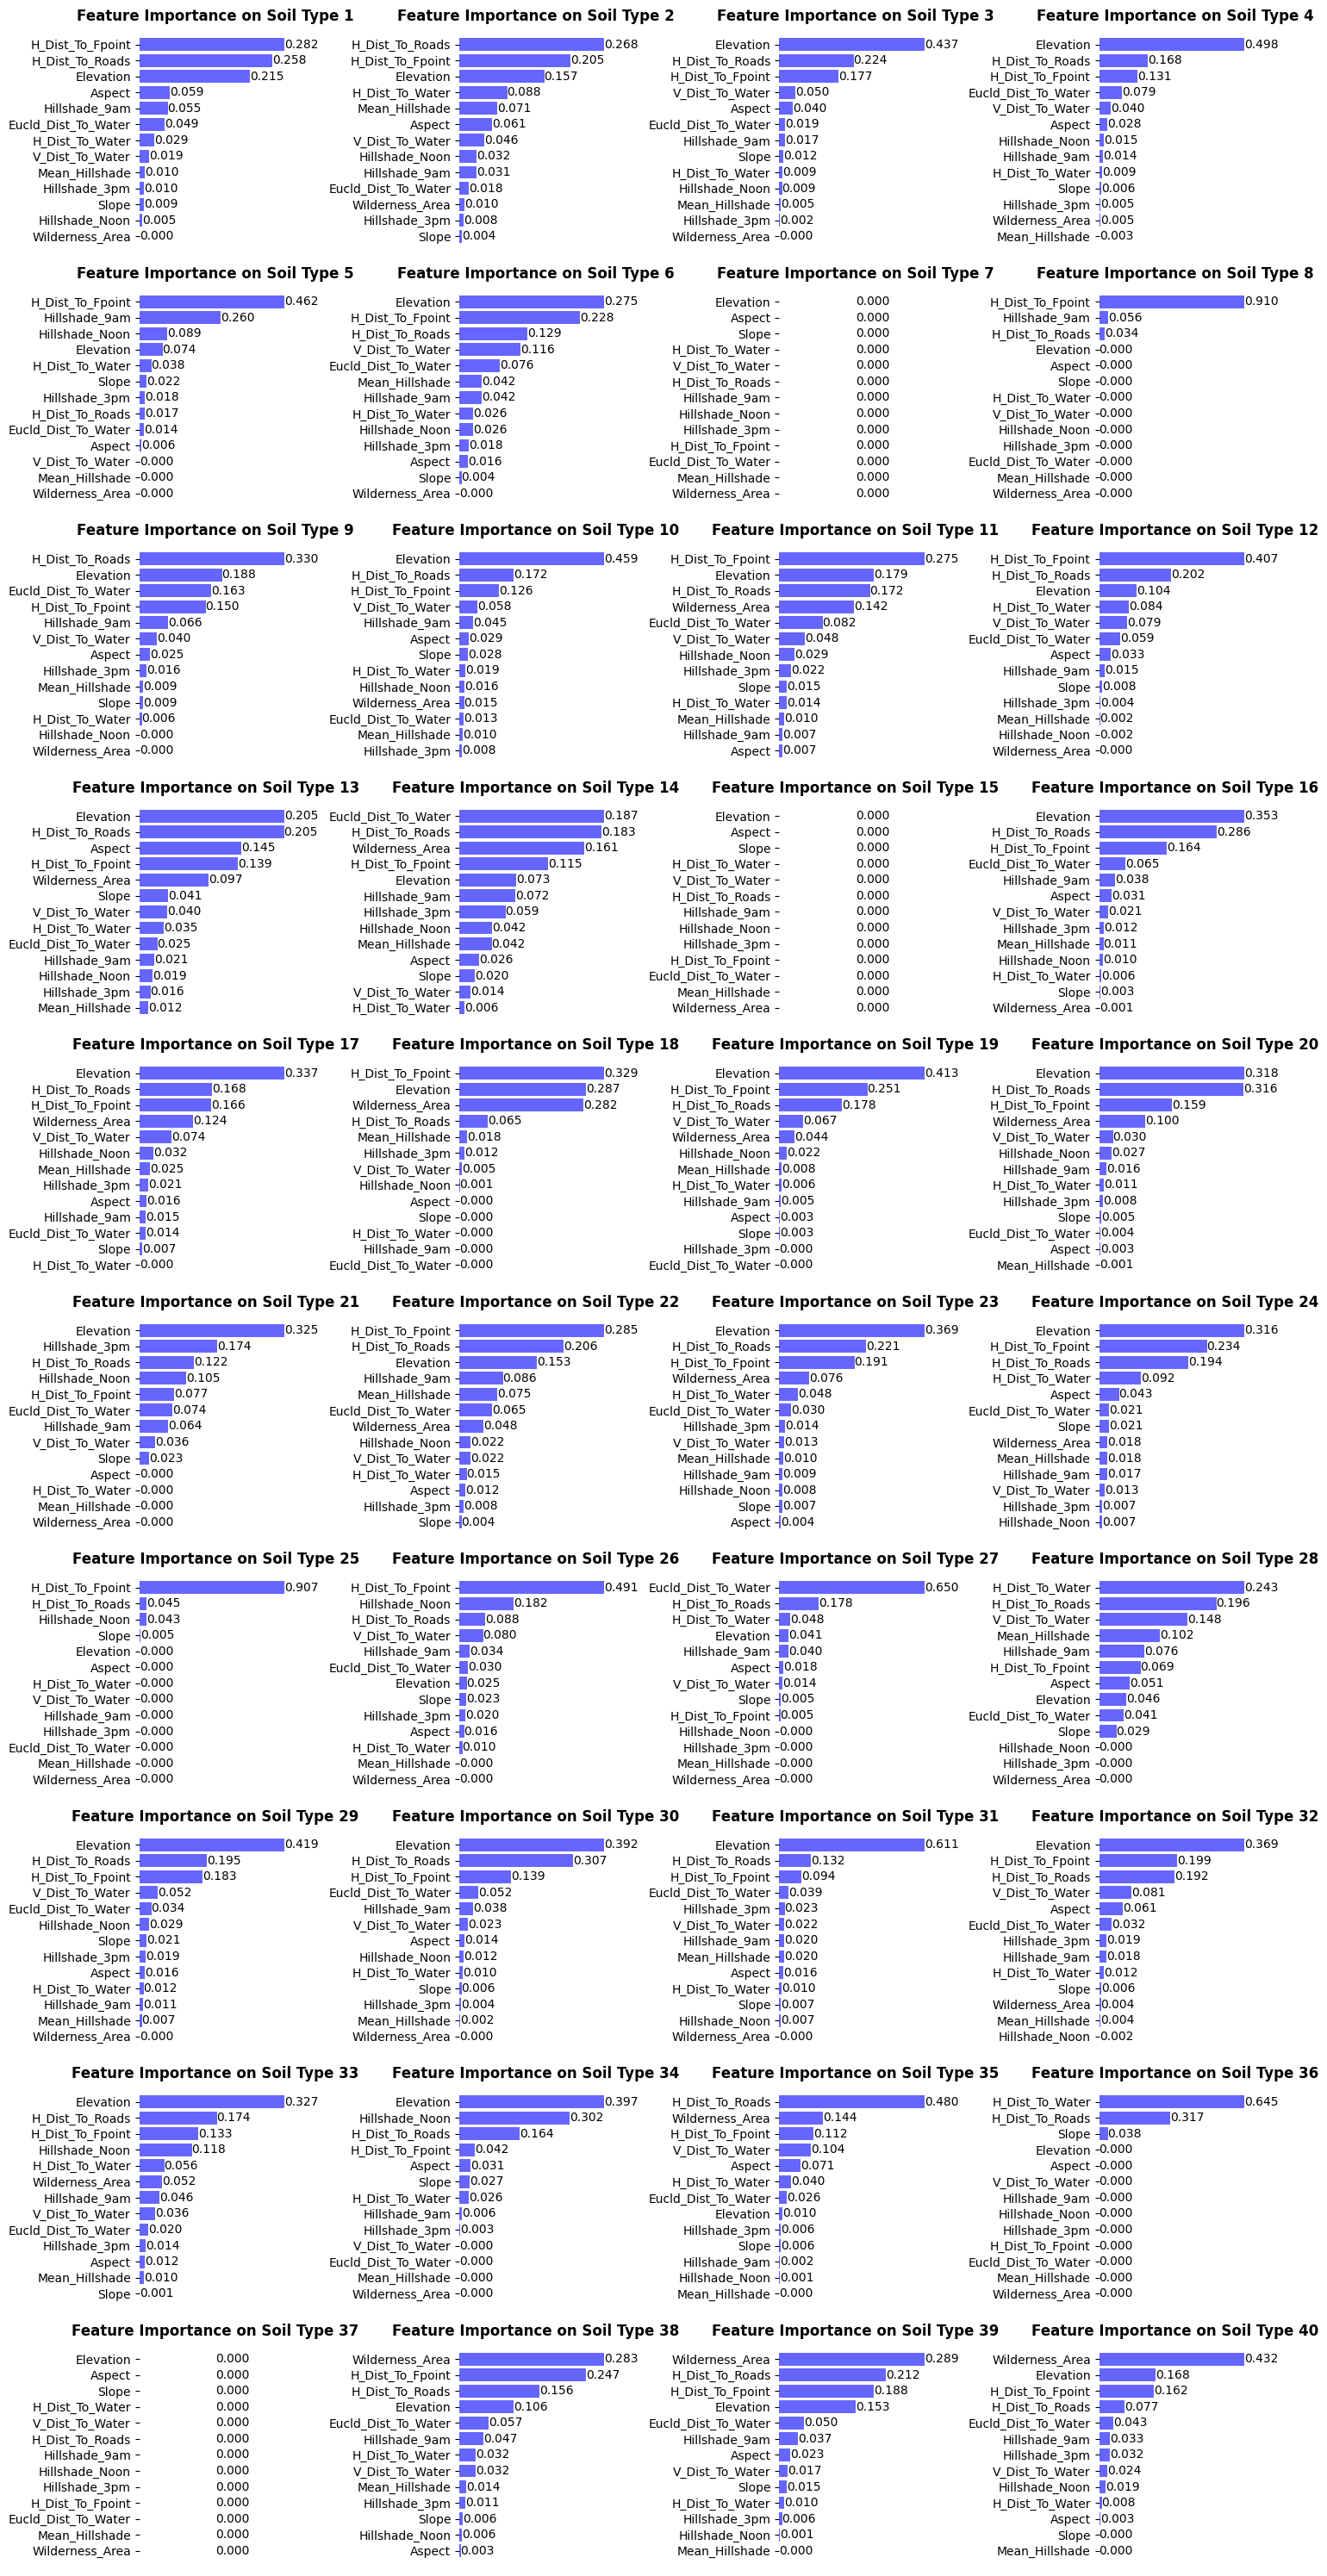

In [36]:
# Combines all the features with the target into 1 DataFrame
full_df = pd.concat([full_X, full_y],axis=1)

# Compile column names of all continuous features and Wilderness_Area in a list
list_of_features = cont_colnames.copy(); list_of_features.append('Wilderness_Area')

# Create separate DataFrame to store the sum of importances for all features
overall_importance = pd.DataFrame({'feature': list_of_features,'importance':np.zeros(len(list_of_features))})

# Initialize subplots for plotting DTC feature importance bar charts
fig, axs = plt.subplots(10, 4, figsize=(15, 30))
idx = 1

# Plots a DTC feature importance bar chart for each sample of Soil_Type taking values of 1 to 40
for i in range(10):
    for j in range(4):
        if idx<41:
            # Extract the observations such that Soil_Type has value 'idx'
            temp_set = full_df.loc[full_df['Soil_Type']==idx]
        
            # Separate according to X and y, followed by a general 70/30 split of the data
            X_soilbased_select = temp_set.drop(['Cover_Type','Soil_Type'],axis=1)
            y_soilbased_select = temp_set['Cover_Type']
            select_Xtrain, select_Xrest, select_ytrain, select_yrest = train_test_split(X_soilbased_select,y_soilbased_select,random_state=42,train_size=0.7)

            # Establish Decision Tree Classifier for identifying feature importance
            soilbased_select_DTC = DecisionTreeClassifier(max_depth = 8,random_state=42).fit(select_Xtrain,select_ytrain,)

            # Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
            feat_imp=pd.DataFrame(soilbased_select_DTC.feature_importances_, index=select_Xtrain.columns).reset_index()
            feat_imp.columns=['feature','importance']
            feat_imp = feat_imp.nlargest(15,columns='importance')
            n_selected_feats = len(feat_imp.feature)

            # Plot bar chart in respective subplot
            axs[i,j].barh(np.arange(n_selected_feats),feat_imp['importance'].iloc[::-1],color='blue',alpha=0.6)
            axs[i,j].set_yticks(np.arange(n_selected_feats),feat_imp['feature'].iloc[::-1])
            axs[i,j].set_xticks([])
            axs[i,j].set_title(f'Feature Importance on Soil Type {idx}',fontweight='bold')
            for k, (name, value) in enumerate(zip(feat_imp['feature'].iloc[::-1],feat_imp['importance'].iloc[::-1])):
                axs[i,j].text(value,k,'{:.3f}'.format(value),ha='left',va='center')
            
            # Adds the importance value for each corresponding feature into that separate DataFrame
            overall_importance['importance'] += feat_imp['importance']

            # Iterate through idx every one step until all the graphs have been plotted
            idx += 1

# Remove axis lines and sufficiently spaces the graphs from each other
sns.despine(top=True, bottom=True,left=True)
plt.tight_layout()
plt.show()

In [37]:
overall_importance['importance'] = overall_importance['importance']/40
overall_importance.sort_values('importance',ascending=False)

feature  importance
0             Elevation    0.219945
9      H_Dist_To_Fpoint    0.210937
5       H_Dist_To_Roads    0.175804
12      Wilderness_Area    0.058148
10  Eucld_Dist_To_Water    0.053292
3       H_Dist_To_Water    0.042602
4       V_Dist_To_Water    0.036616
6         Hillshade_9am    0.033946
7        Hillshade_Noon    0.031017
1                Aspect    0.023003
8         Hillshade_3pm    0.014983
11       Mean_Hillshade    0.013510
2                 Slope    0.011198

In [ ]:
### TO BE RUN IF FILES DON'T EXIST ON LOCAL MACHINE YET
### NOTE: soil_df comprises of Soil_Type1 to Soil_Type40 

from sklearn.preprocessing import PolynomialFeatures

# Extract all necessary features for desired soil type DataFrames
soil_df = disc_features.drop(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3', 'Wilderness_Area4','Cover_Type'],axis=1)
soil_df_reduced = soil_df.loc[:,['Soil_Type3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type39', 'Soil_Type38']] # Selected based on top 5 

# Define object to create interaction terms
PolyFeat = PolynomialFeatures(2, interaction_only=True, include_bias=False)

# Create interaction terms between all 40 soil types
X_interactions = PolyFeat.fit_transform(soil_df)
inter_feats_names1 = PolyFeat.get_feature_names_out(input_features=soil_df.columns)
X_inters_df = pd.DataFrame(X_interactions, columns=inter_feats_names1)

# Create interaction terms between the DT feature selected soil types (3, 4, 10, 39, 38)
X_interactions_reduced = PolyFeat.fit_transform(soil_df_reduced)
inter_feats_names2 = PolyFeat.get_feature_names_out(input_features=soil_df_reduced.columns)
X_inters_df_reduced = pd.DataFrame(X_interactions_reduced, columns=inter_feats_names2)

# Combine interaction terms of soil types with the original DataFrame
soil_df = pd.concat([soil_df, X_inters_df,df['Cover_Type']], axis=1)
soil_df_reduced = pd.concat([soil_df_reduced, X_inters_df_reduced,df['Cover_Type']], axis=1)

with open('soils_n_interactions.pkl', 'wb') as file1:
    pickle.dump(soil_df, file1)
with open('soils_inters_reduced.pkl', 'wb') as file2:
    pickle.dump(soil_df_reduced, file2)

In [48]:
df_upd

Elevation  H_Dist_To_Roads  H_Dist_To_Fpoint  Soil_Type  Cover_Type
0       -1.297805        -1.180146          3.246283         29           5
1       -1.319235        -1.257106          3.205504         29           5
2       -0.554907         0.532212          3.126965         12           2
3       -0.622768         0.474492          3.194931         30           2
4       -1.301377        -1.256464          3.165479         29           5
...           ...              ...               ...        ...         ...
581007  -2.012130        -1.437962         -0.863386          2           3
581008  -2.029988        -1.446299         -0.857345          2           3
581009  -2.047847        -1.449506         -0.850548          2           3
581010  -2.054990        -1.449506         -0.842997          2           3
581011  -2.058562        -1.464256         -0.834690          2           3

[581012 rows x 5 columns]

In [61]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(df_upd.drop('Cover_Type',axis=1),df_upd['Cover_Type'],train_size=0.8)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

nn_model = Sequential()
nn_model.add(Dense(units = 32, activation = 'relu', input_dim = len(df_upd.columns) -1))
nn_model.add(Dense(units = 64, activation = 'relu'))
nn_model.add(Dense(units = 7, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [64]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train is integer encoded, convert it to one-hot encoded format
y_train_encoded = to_categorical(y_train - 1)  # Subtracting 1 to make labels start from 0

# Assuming y_test is integer encoded, convert it to one-hot encoded format
y_test_encoded = to_categorical(y_test - 1)  # Subtracting 1 to make labels start from 0

# Rest of your code remains the same

nn_model = Sequential()
nn_model.add(Dense(units=32, activation='relu', input_dim=len(df_upd.columns) - 1))
nn_model.add(Dense(units=64, activation='relu'))
nn_model.add(Dense(units=7, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn_model.fit(X_train, y_train_encoded, epochs=150, batch_size=32)

Epoch 1/150
14526/14526 [==============================] - 5s 344us/step - loss: 0.7912 - accuracy: 0.6639
Epoch 2/150
14526/14526 [==============================] - 5s 336us/step - loss: 0.7215 - accuracy: 0.6857
Epoch 3/150
14526/14526 [==============================] - 5s 332us/step - loss: 0.7001 - accuracy: 0.6953
Epoch 4/150
14526/14526 [==============================] - 5s 335us/step - loss: 0.6855 - accuracy: 0.7040
Epoch 5/150
14526/14526 [==============================] - 5s 332us/step - loss: 0.6753 - accuracy: 0.7090
Epoch 6/150
14526/14526 [==============================] - 5s 337us/step - loss: 0.6678 - accuracy: 0.7123
Epoch 7/150
14526/14526 [==============================] - 5s 338us/step - loss: 0.6619 - accuracy: 0.7156
Epoch 8/150
14526/14526 [==============================] - 5s 336us/step - loss: 0.6572 - accuracy: 0.7172
Epoch 9/150
14526/14526 [==============================] - 5s 333us/step - loss: 0.6526 - accuracy: 0.7194
Epoch 10/150
14526/14526 [===========

KeyboardInterrupt: 